## Problem Statement
Given the details of cell nuclei taken from breast mass, predict whether or not a patient has breast cancer using the Ensembling Techniques. And perform necessary exploratory data analysis before building the model and evaluate the model based on performance metrics other than model accuracy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv('cancer.csv')
print(type(df1))
print(df1.shape)
df1.head()

<class 'pandas.core.frame.DataFrame'>
(569, 33)


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
df = df1.copy()

### Data Preprocessing

In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.drop('Unnamed: 32', axis =1, inplace=True)
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [6]:
df.drop('id', axis=1, inplace=True)
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [7]:
df.duplicated().sum()

0

### EDA

In [8]:
df['diagnosis'].value_counts() # M = Malignant, B = Beningn

B    357
M    212
Name: diagnosis, dtype: int64

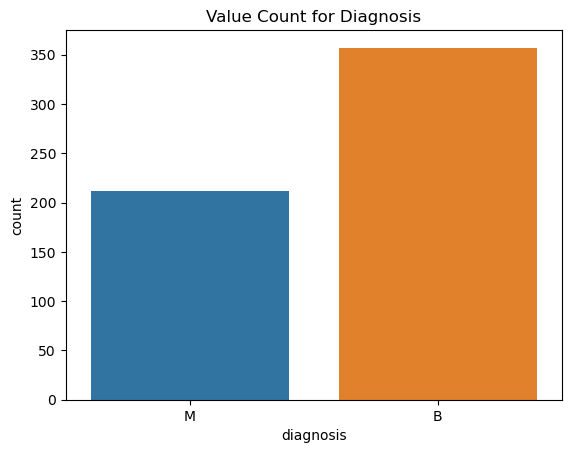

In [9]:
sns.countplot(x=df['diagnosis'])
plt.title('Value Count for Diagnosis')
plt.show()

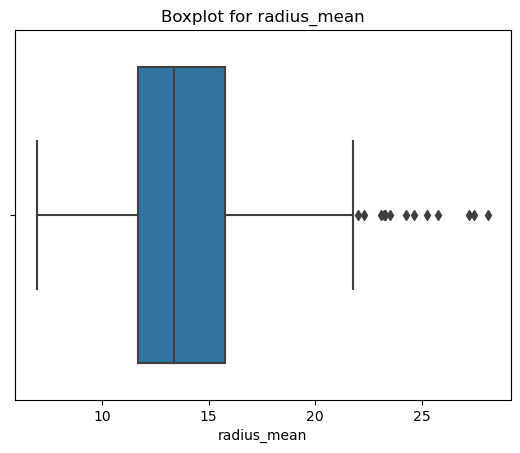

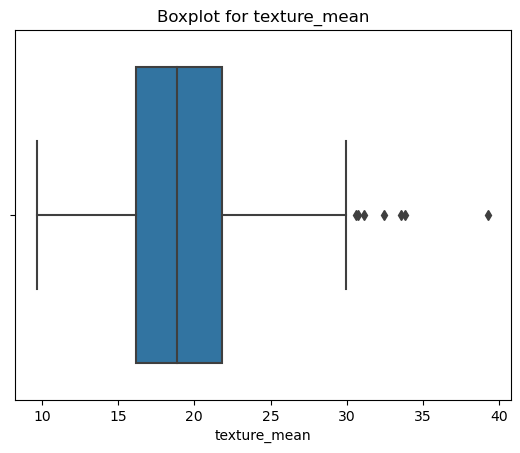

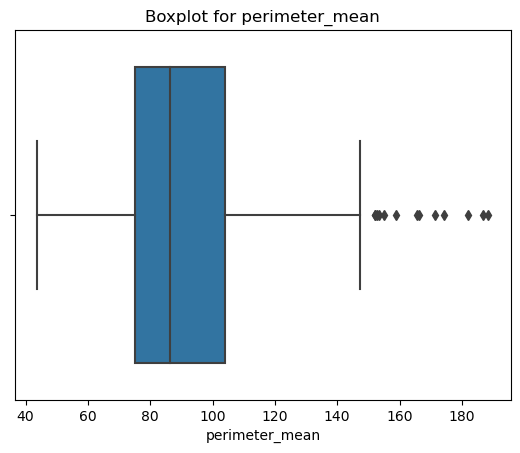

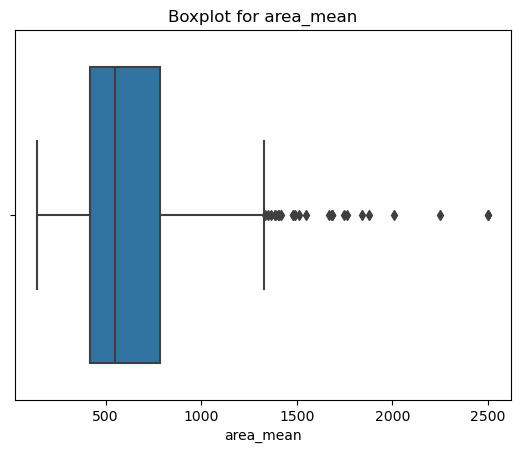

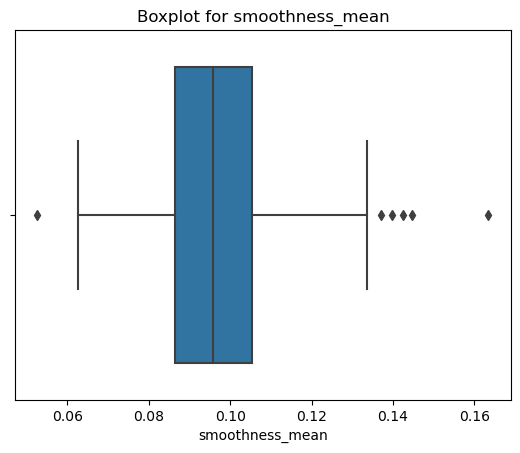

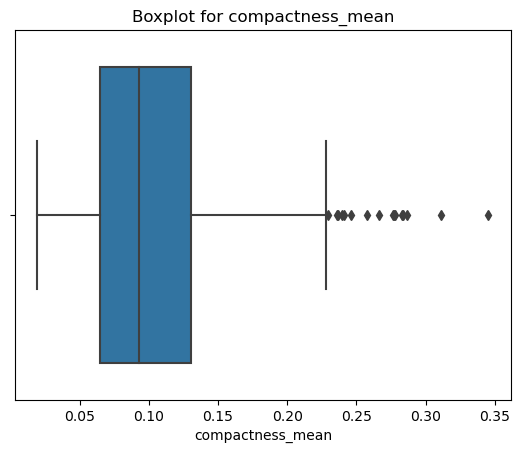

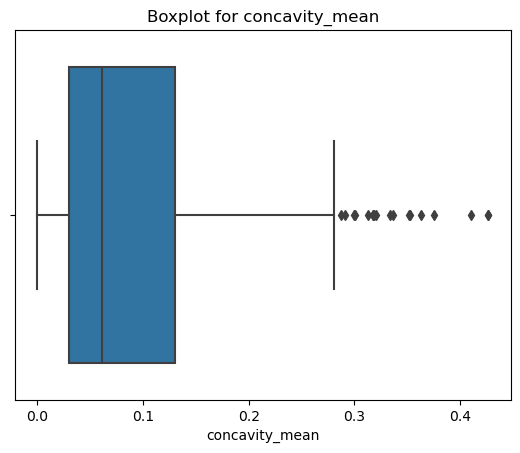

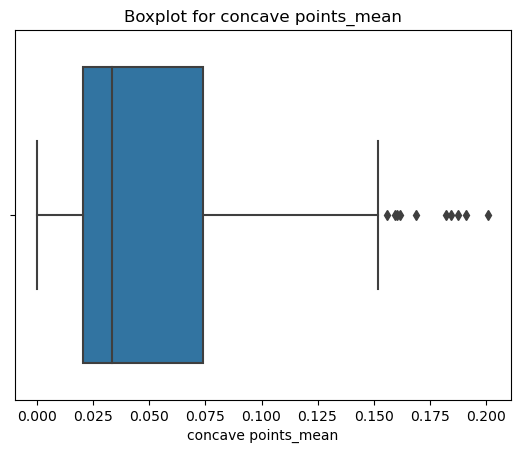

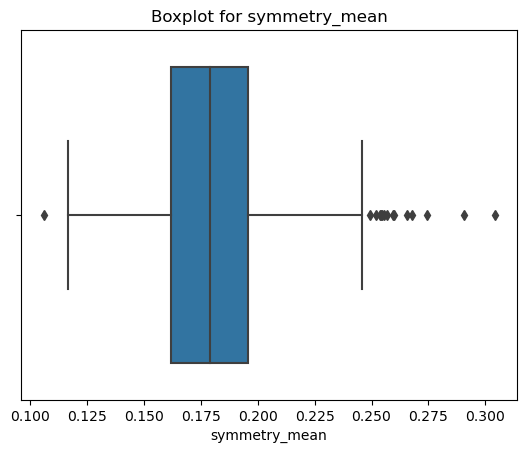

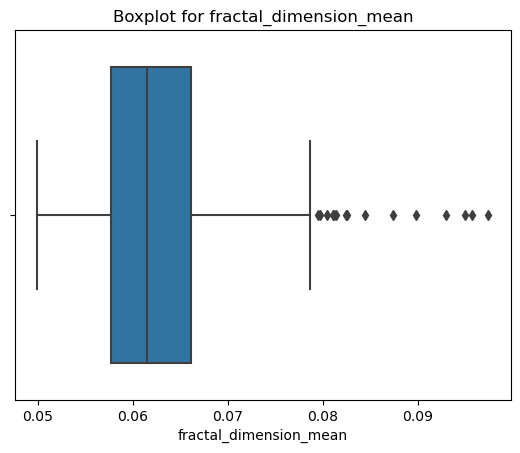

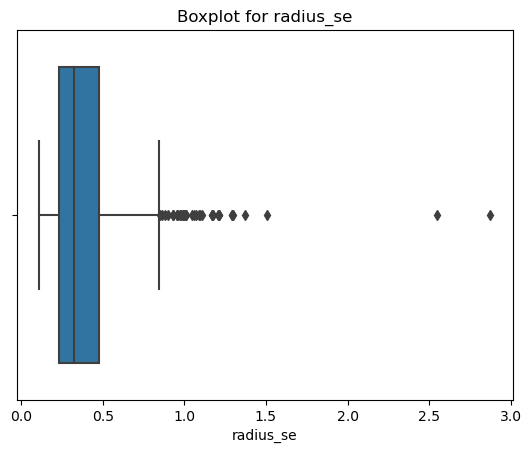

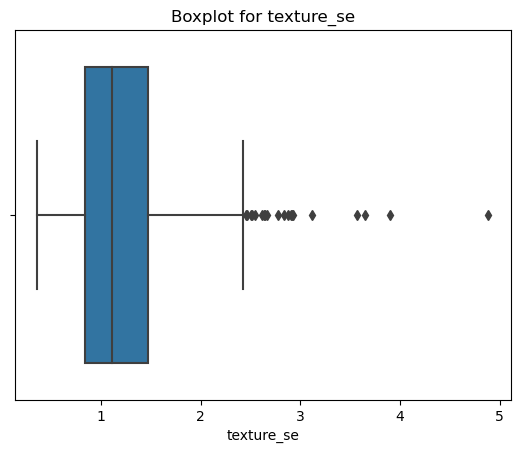

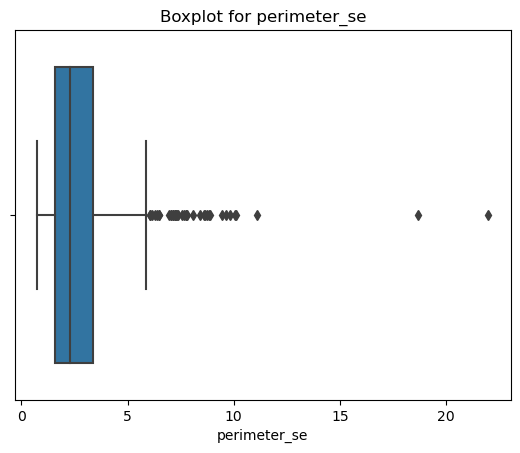

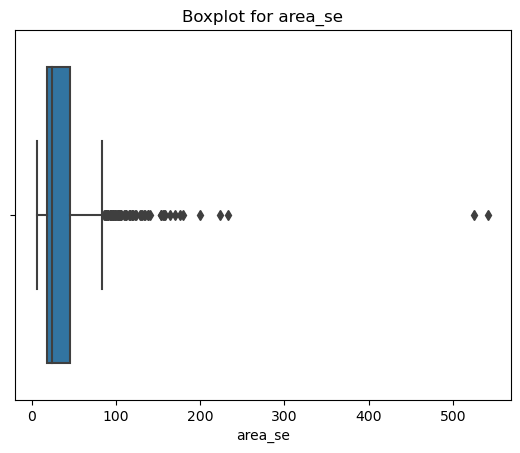

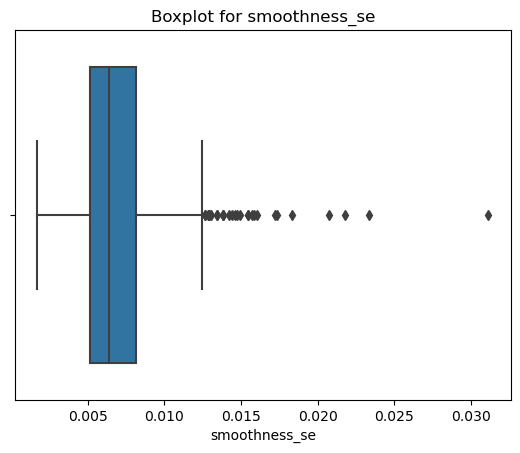

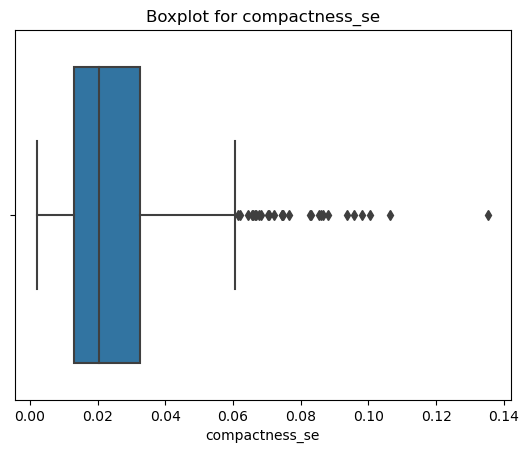

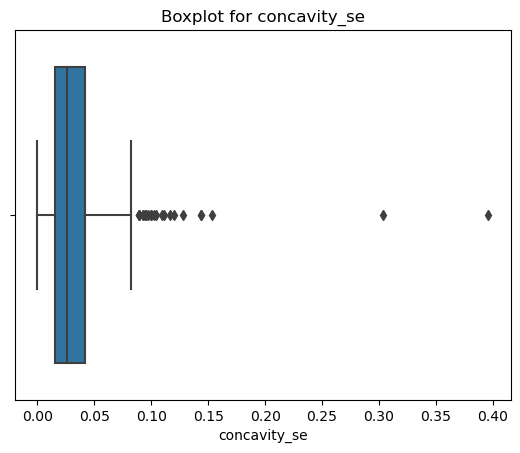

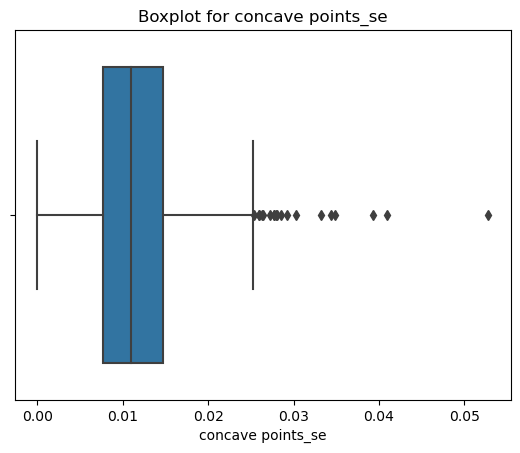

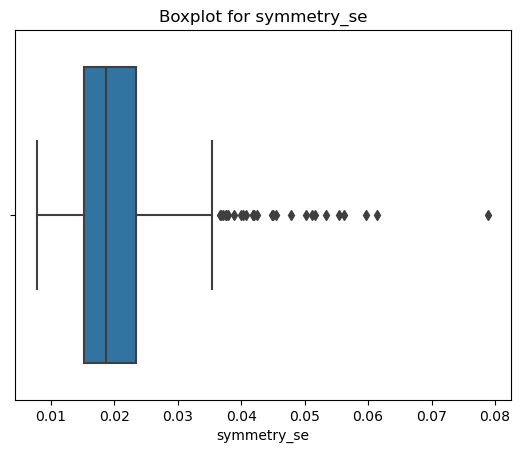

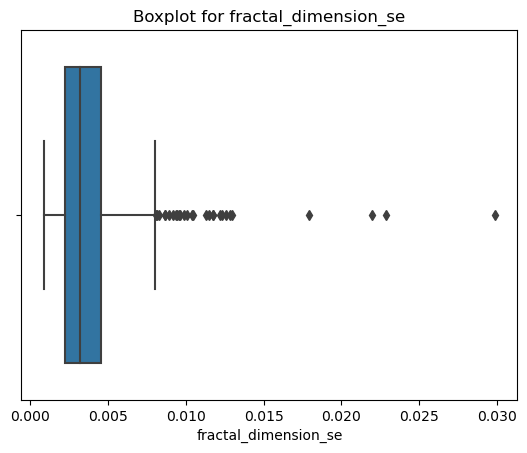

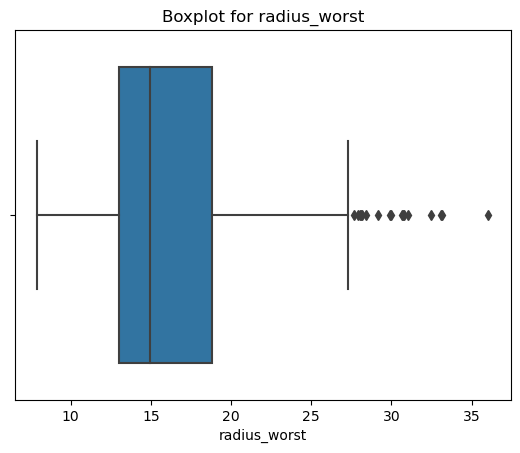

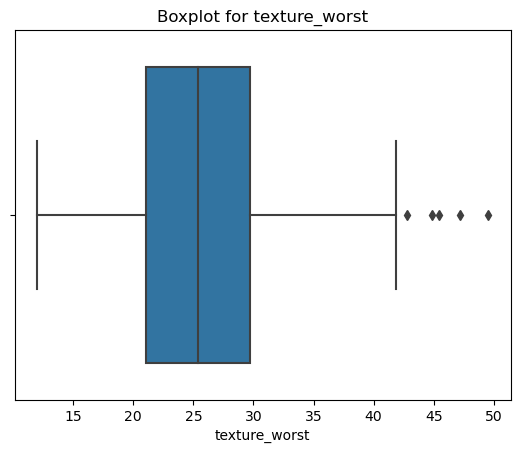

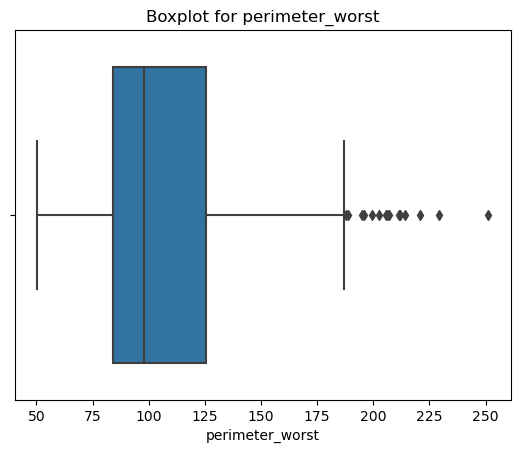

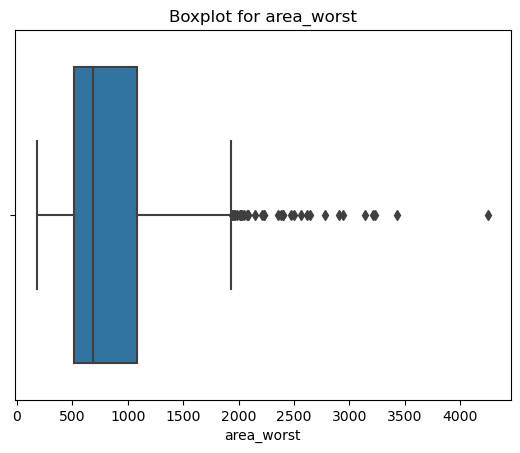

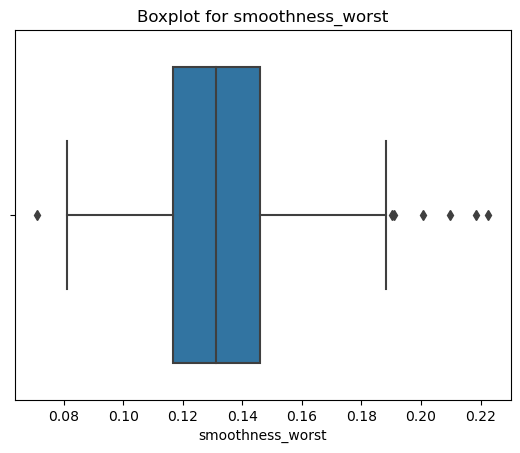

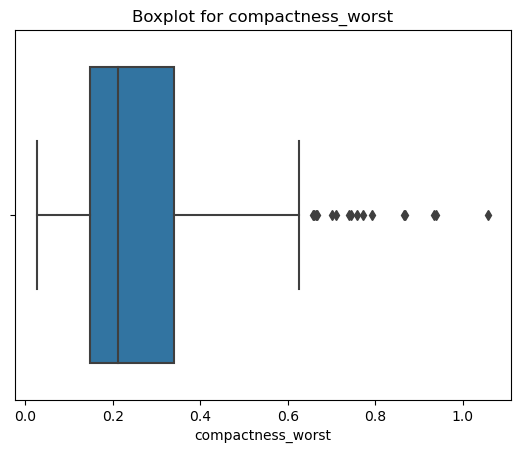

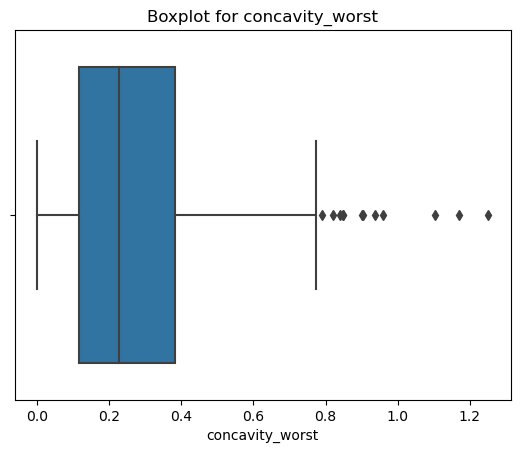

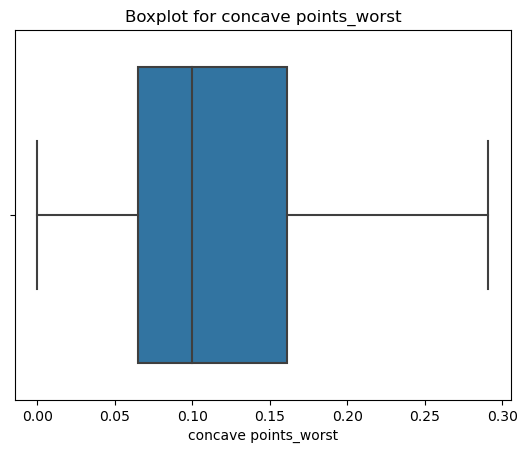

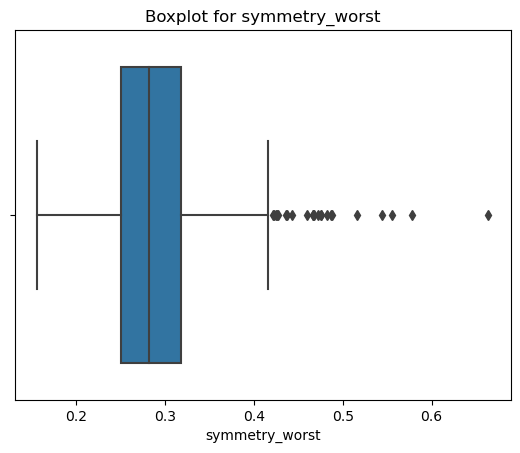

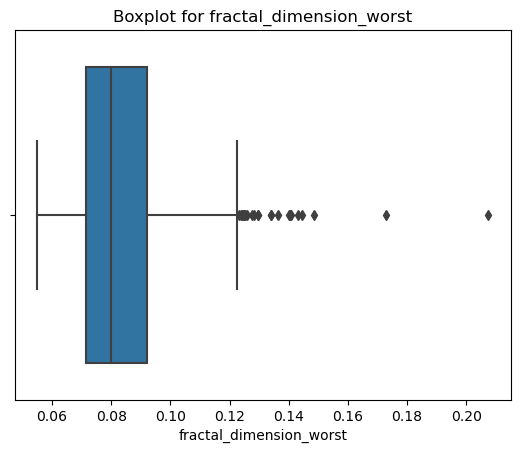

In [10]:
cont_cols = df.drop('diagnosis', axis=1)
for i in cont_cols:
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

#### inference: 
most of the columns have outliers

In [11]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

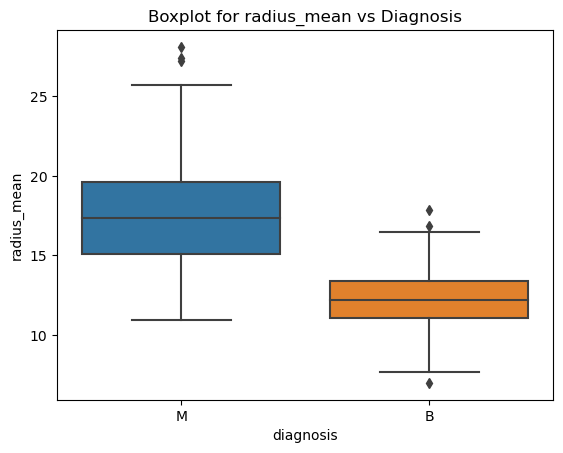

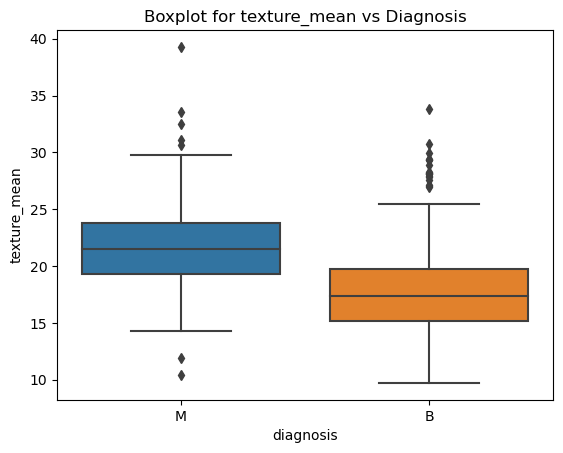

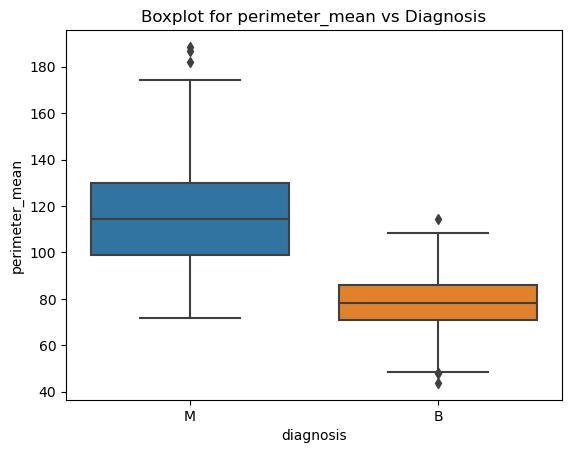

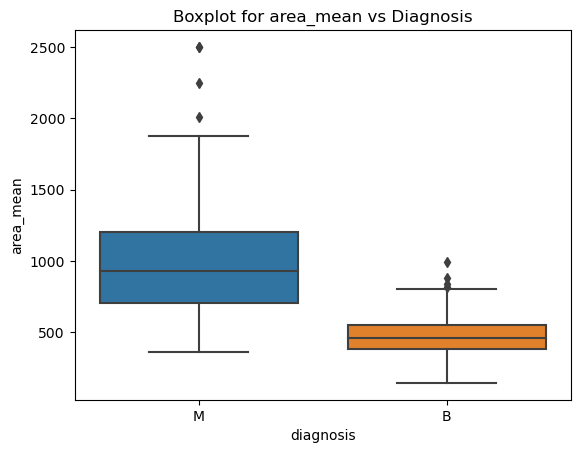

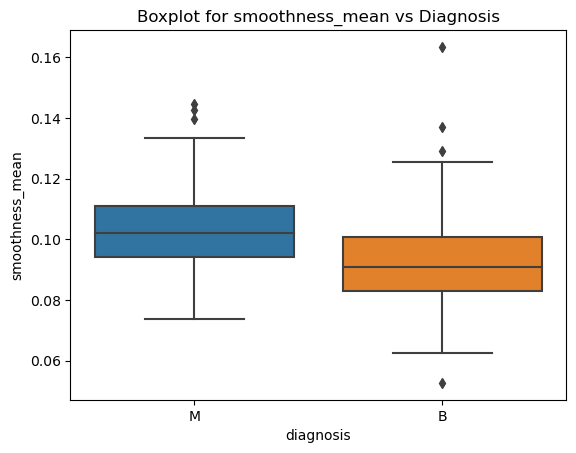

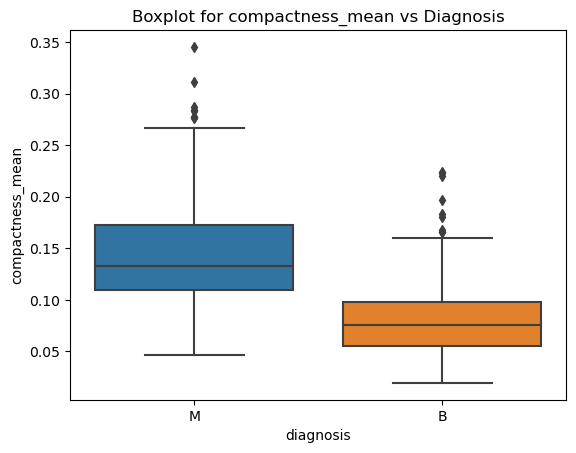

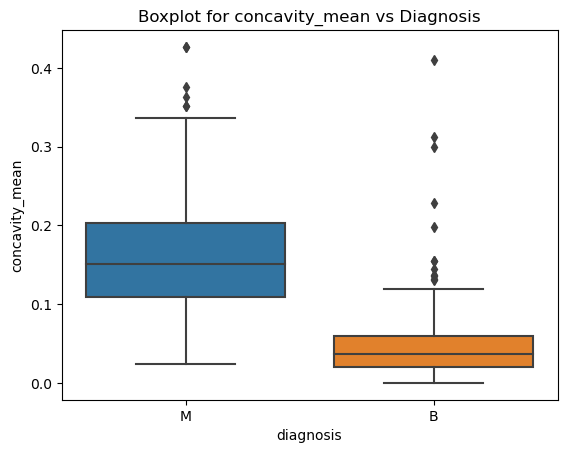

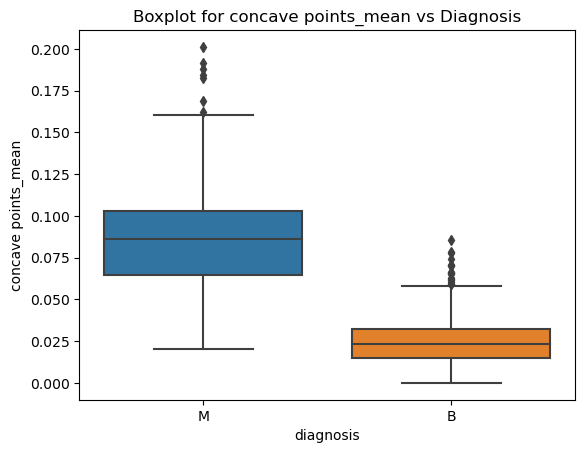

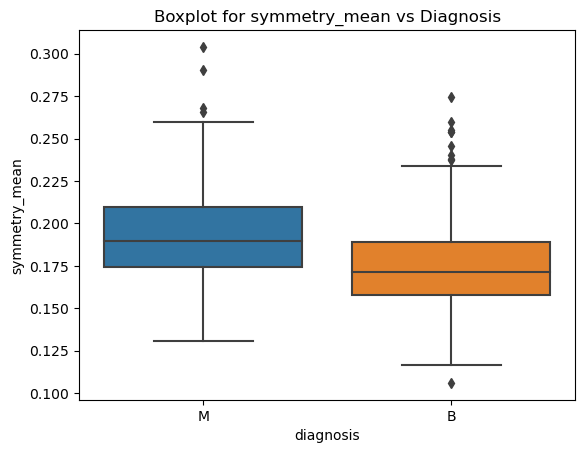

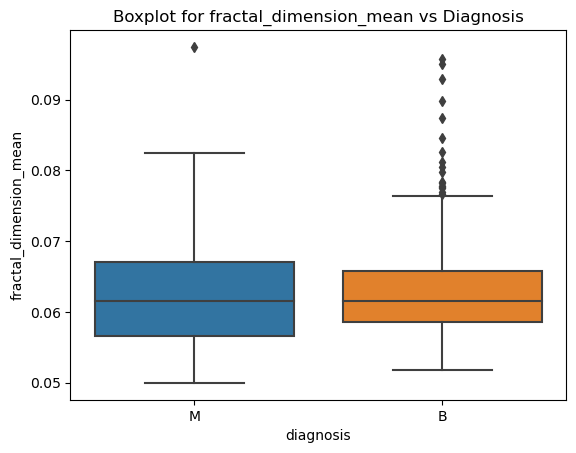

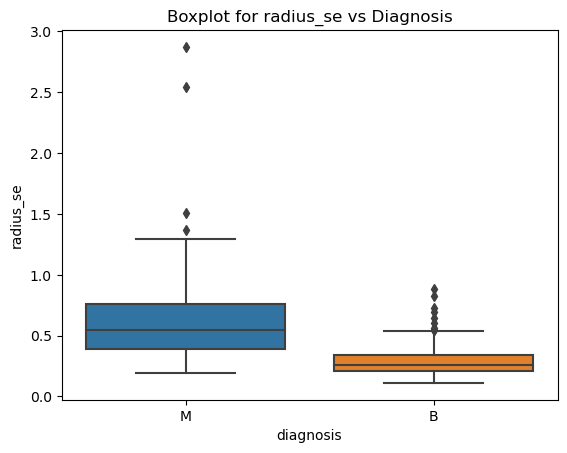

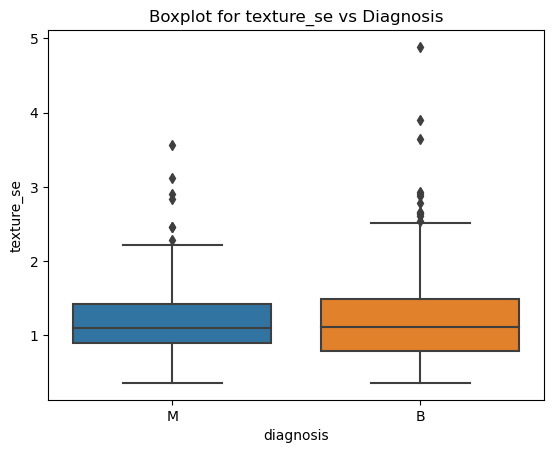

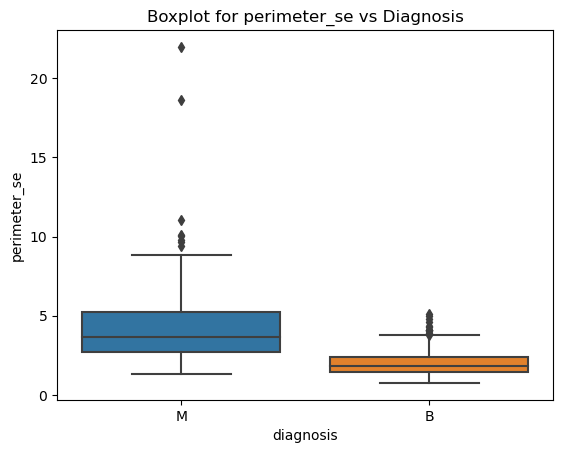

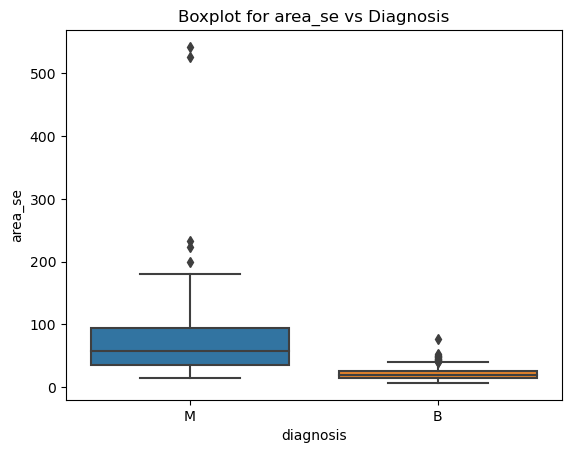

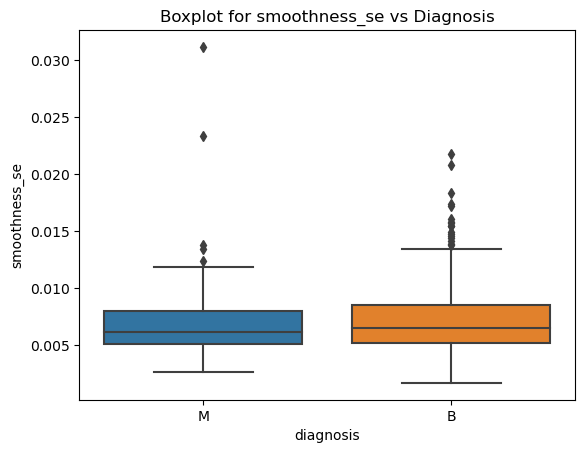

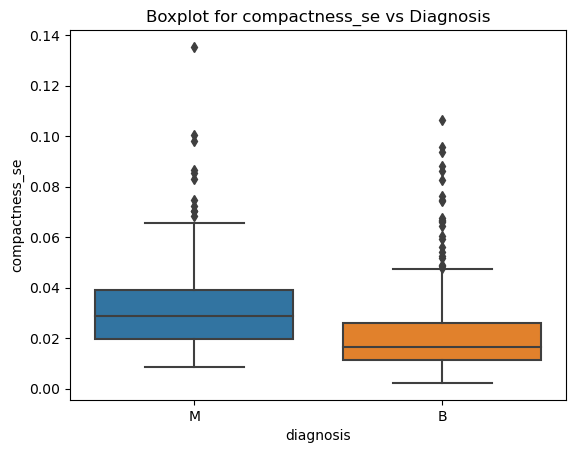

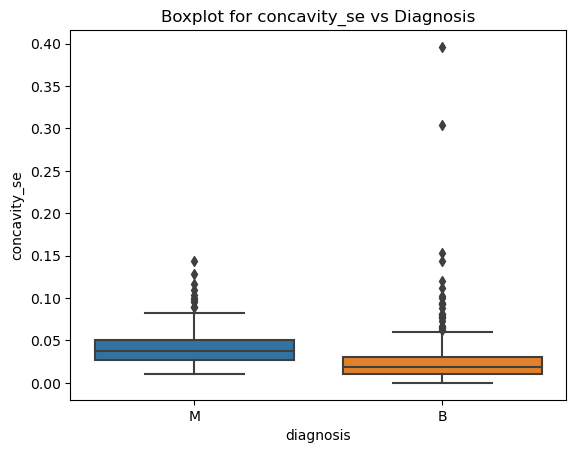

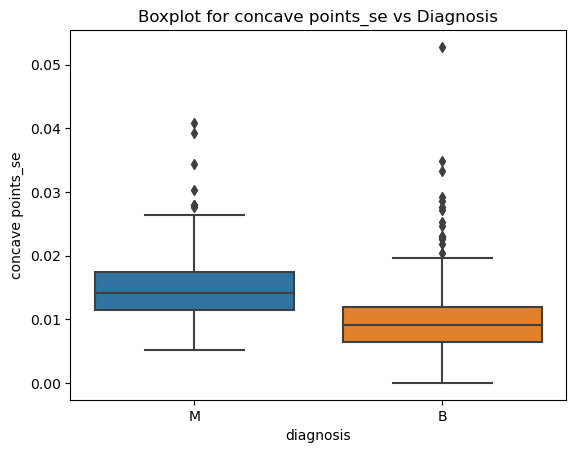

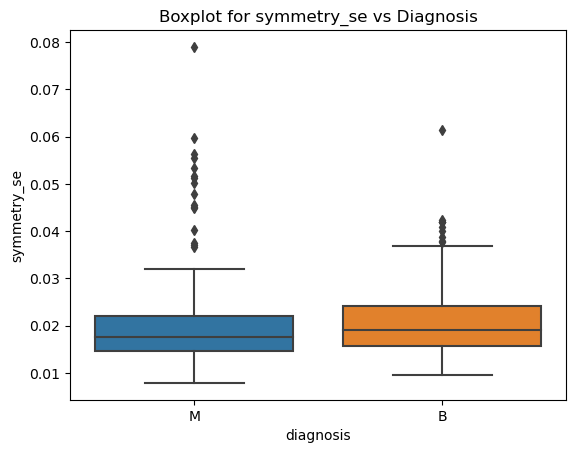

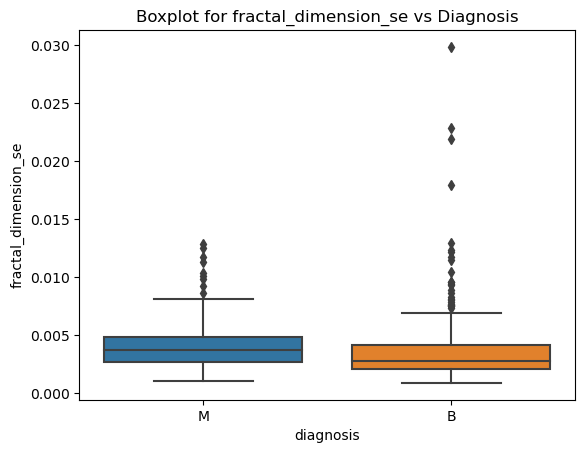

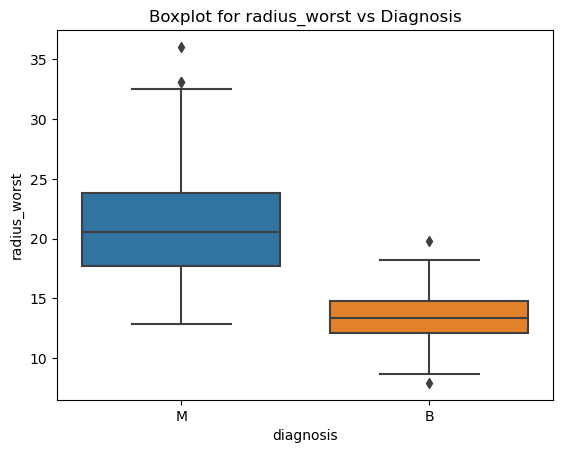

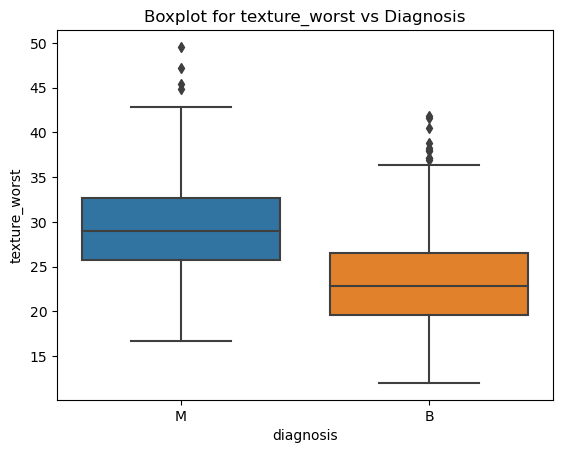

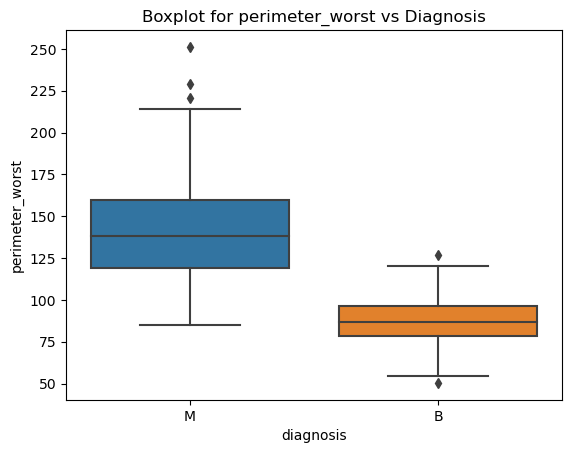

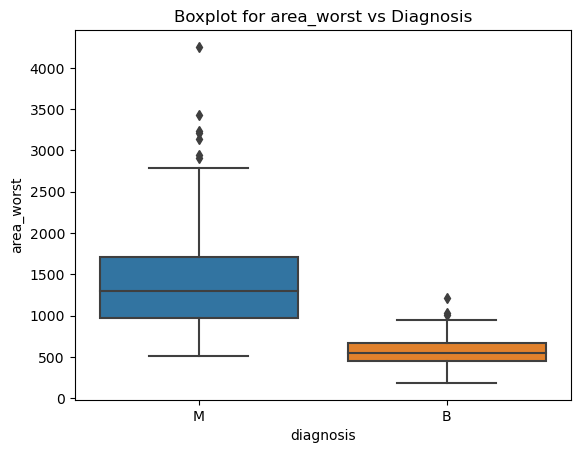

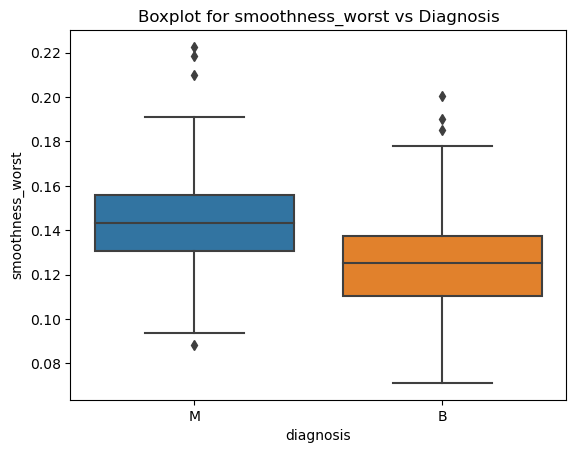

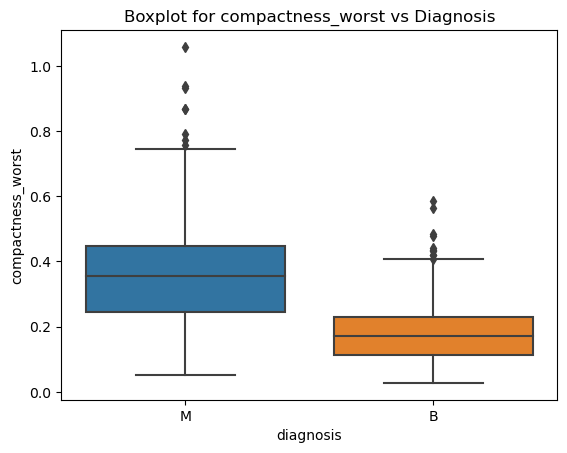

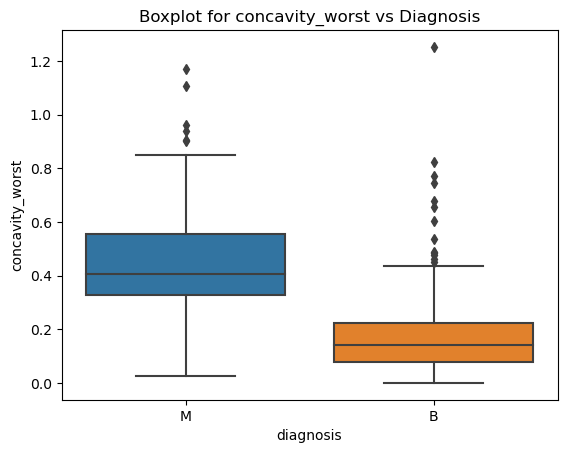

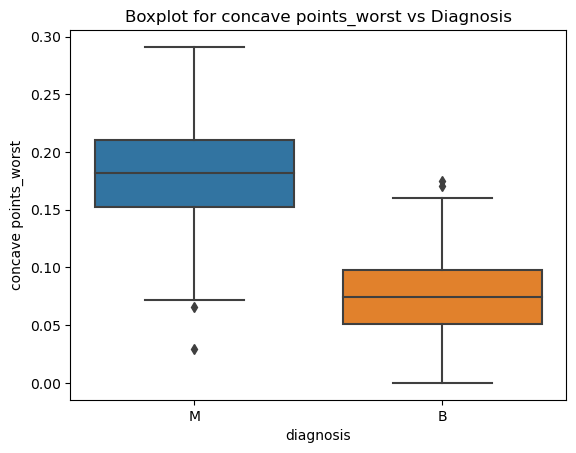

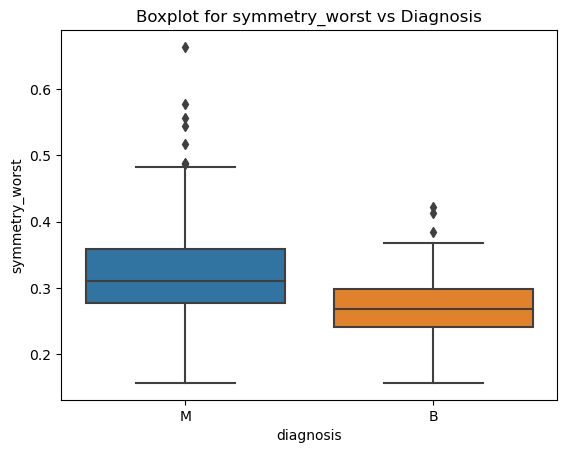

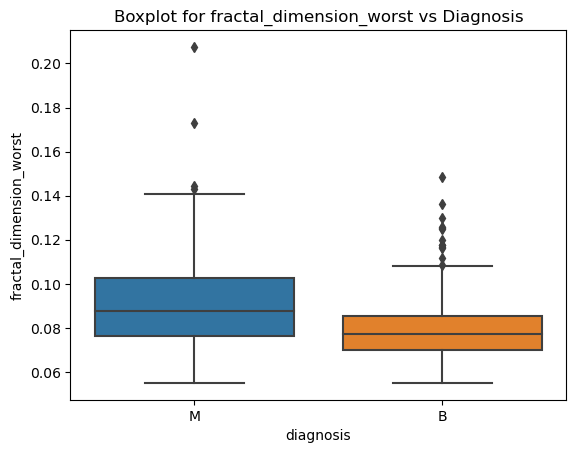

In [12]:
feat = ['radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean']
for i in df.columns[1:]:
    sns.boxplot(y=df[i], x=df['diagnosis'])
    plt.title(f'Boxplot for {i} vs Diagnosis')
    plt.show()

#### inference: 
Malignant cells have higher values as compared to Benign cells in most columns

#### Pairplot

<Figure size 2500x2500 with 0 Axes>

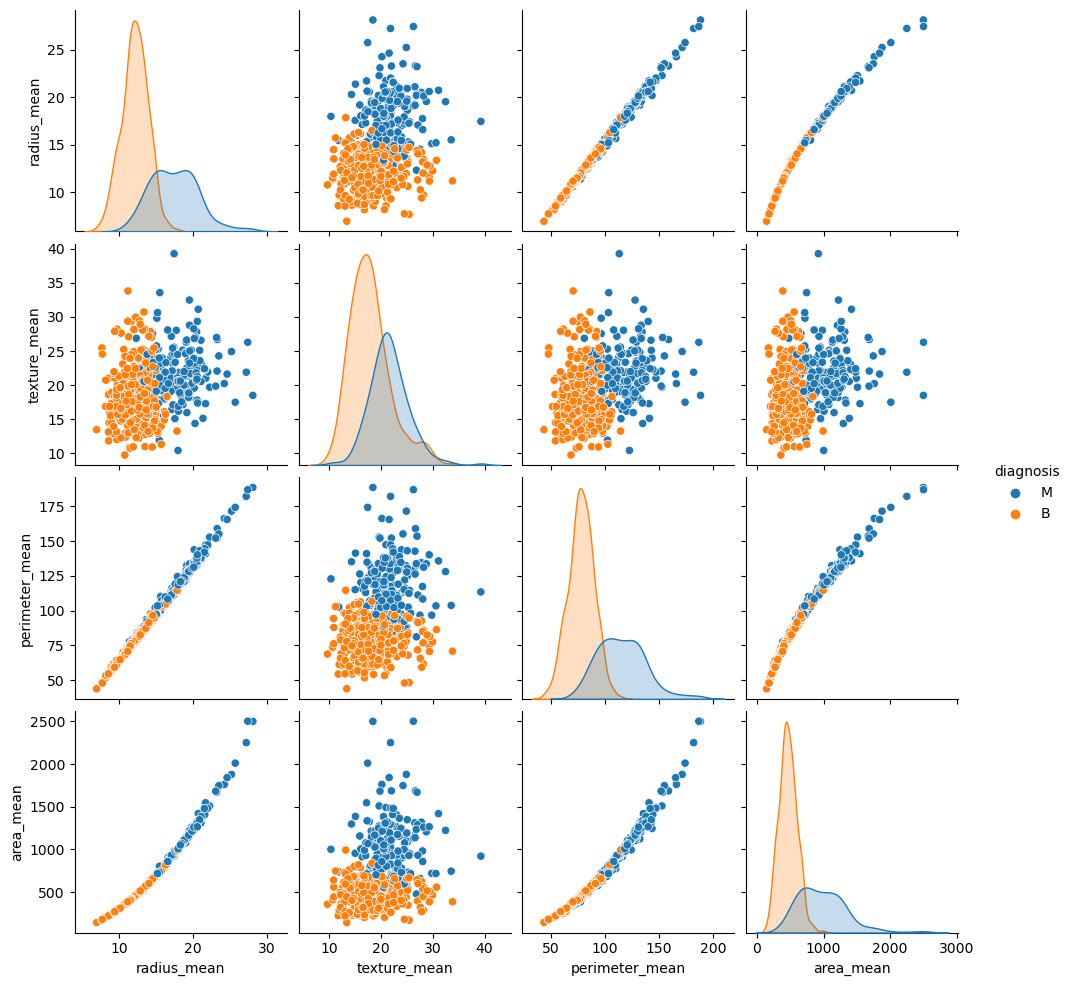

In [15]:
plt.figure(figsize=(25,25))
sns.pairplot(data=df,vars=['radius_mean', 'texture_mean', 'perimeter_mean','area_mean'], hue='diagnosis')
plt.show()

<Figure size 2500x2500 with 0 Axes>

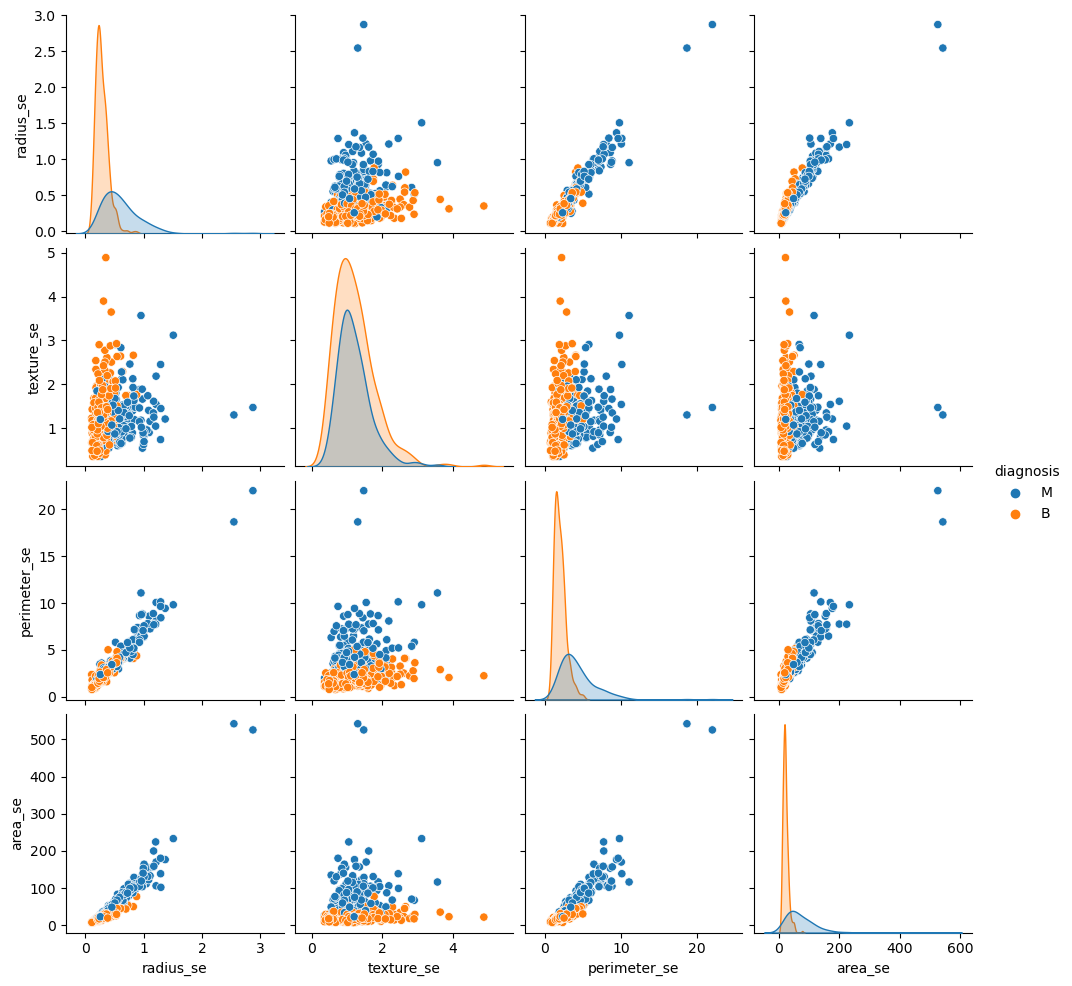

In [16]:
plt.figure(figsize=(25,25))
sns.pairplot(data=df,vars=['radius_se', 'texture_se', 'perimeter_se', 'area_se'], hue='diagnosis')
plt.show()

<Figure size 2500x2500 with 0 Axes>

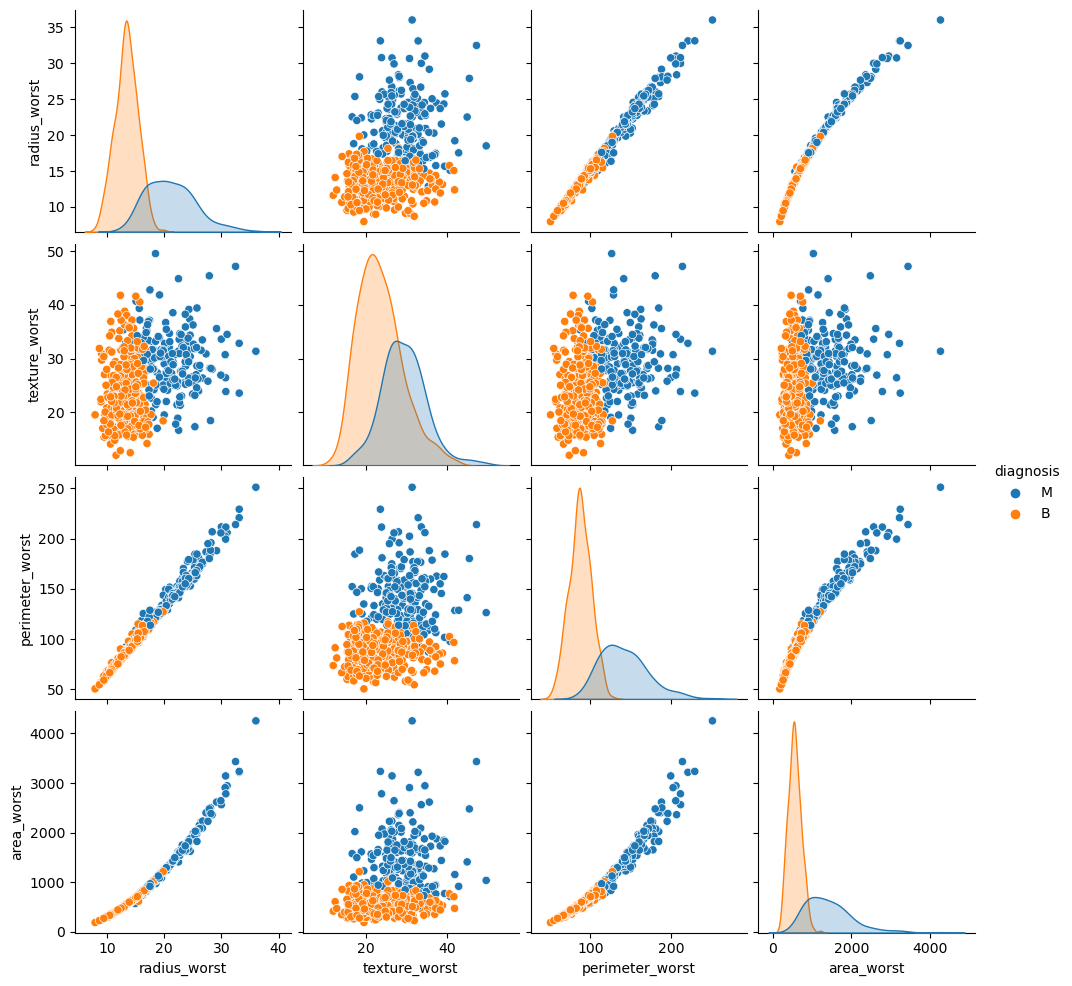

In [17]:
plt.figure(figsize=(25,25))
sns.pairplot(data=df,vars=['radius_worst', 'texture_worst','perimeter_worst', 'area_worst'], hue='diagnosis')
plt.show()

<Figure size 2500x2500 with 0 Axes>

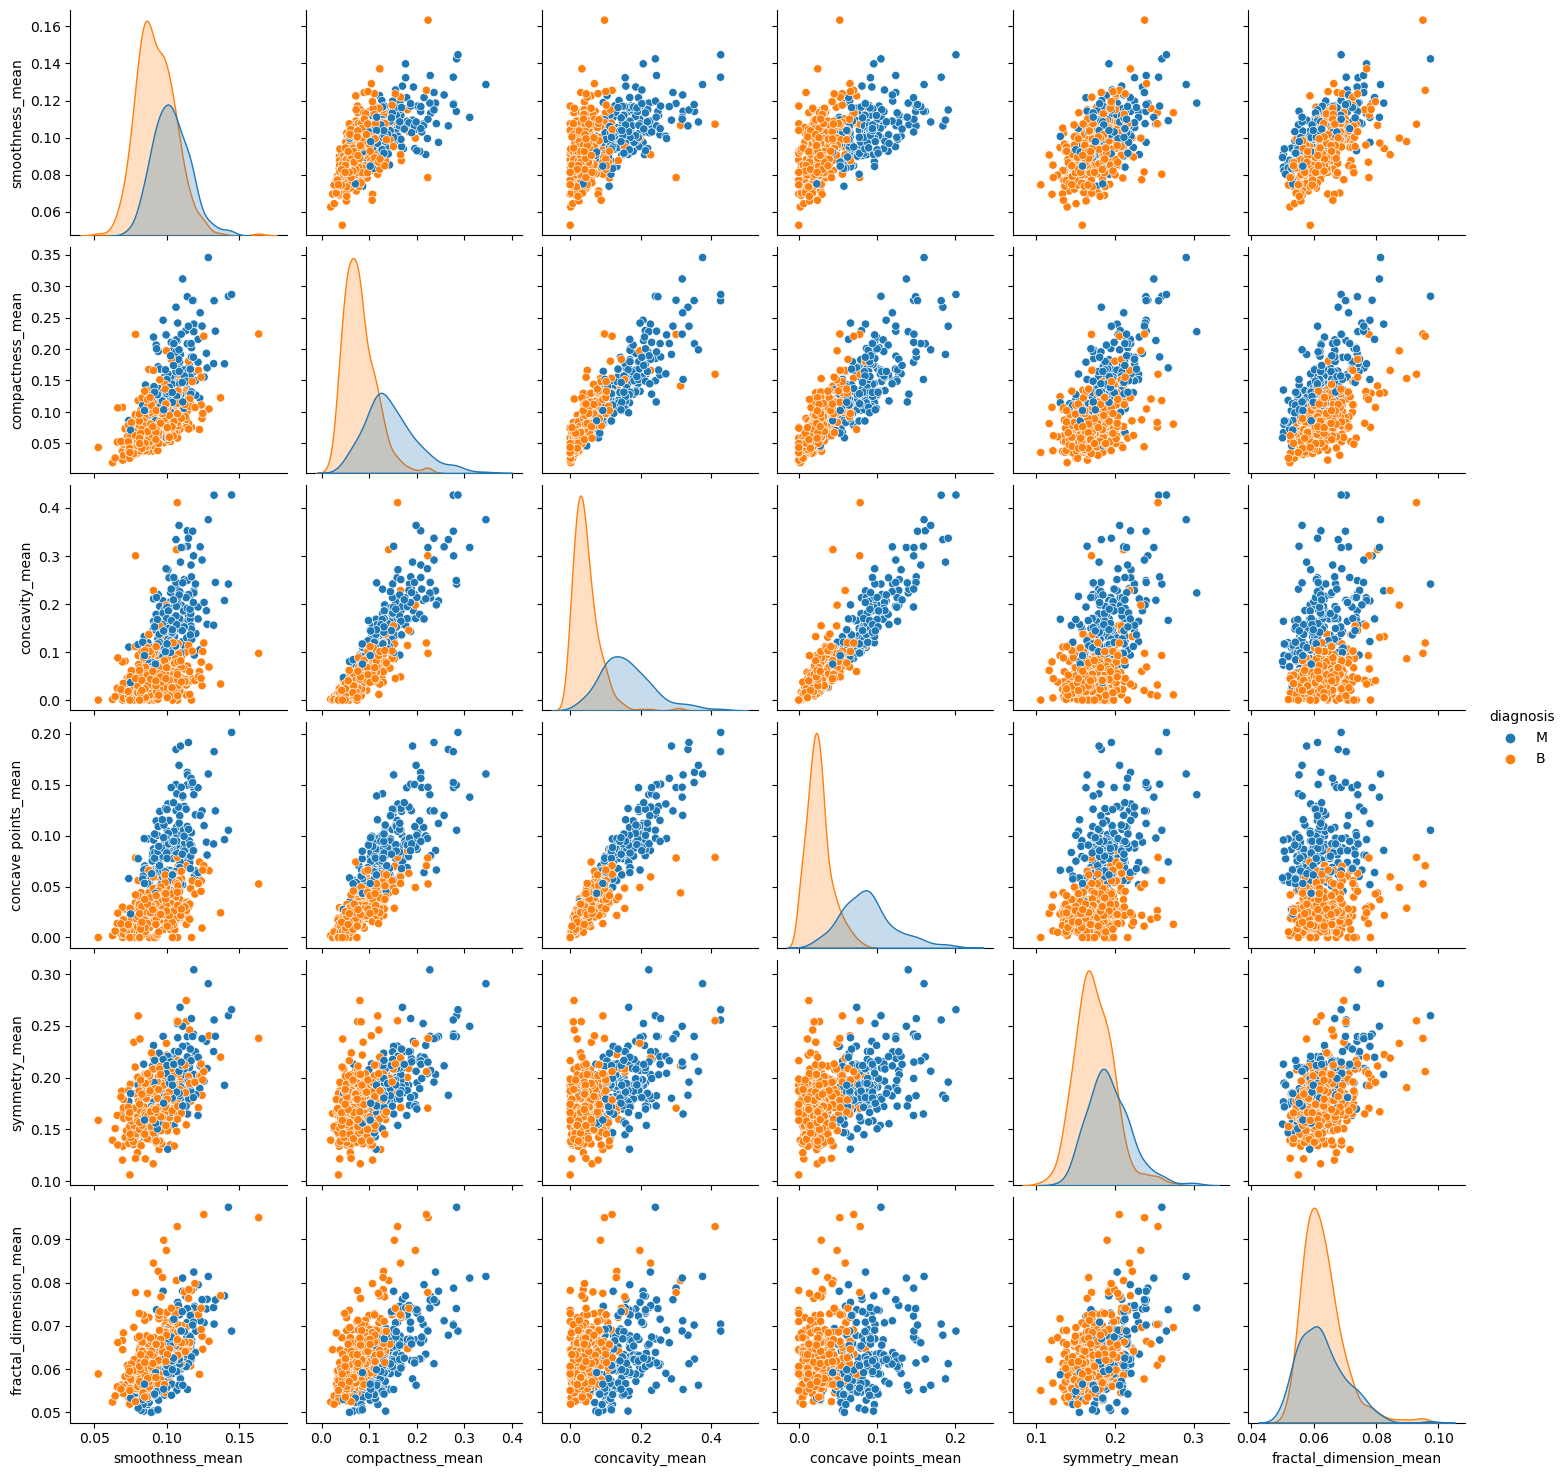

In [18]:
plt.figure(figsize=(25,25))
sns.pairplot(data=df,vars=['smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'], hue='diagnosis')
plt.show()

In [19]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Statistical Analysis

In [13]:
# for selected columns
# df.groupby(['diagnosis']).agg({'radius_mean':['mean','min','max', 'std','var','median'],
#                               'compactness_mean':['mean','min','max', 'std','var','median']}).T

In [14]:
feat_desc = df.groupby(['diagnosis']).agg(['mean','min','max', 'std','median']).T
feat_desc.head(30)

diagnosis                         B            M
radius_mean      mean     12.146524    17.462830
                 min       6.981000    10.950000
                 max      17.850000    28.110000
                 std       1.780512     3.203971
                 median   12.200000    17.325000
texture_mean     mean     17.914762    21.604906
                 min       9.710000    10.380000
                 max      33.810000    39.280000
                 std       3.995125     3.779470
                 median   17.390000    21.460000
perimeter_mean   mean     78.075406   115.365377
                 min      43.790000    71.900000
                 max     114.600000   188.500000
                 std      11.807438    21.854653
                 median   78.180000   114.200000
area_mean        mean    462.790196   978.376415
                 min     143.500000   361.600000
                 max     992.100000  2501.000000
                 std     134.287118   367.937978
                 median  458.400000   932.000000
smoothness_mean  mean      0.092478     0.102898
                 min       0.052630     0.073710
                 max       0.163400     0.144700
                 std       0.013446     0.012608
                 median    0.090760     0.102200
compactness_mean mean      0.080085     0.145188
                 min       0.019380     0.046050
                 max       0.223900     0.345400
                 std       0.033750     0.053987
                 median    0.075290     0.132350

#### inference: 
Malignant cells have higher values as compared to Benign cells in most columns

### Correlation

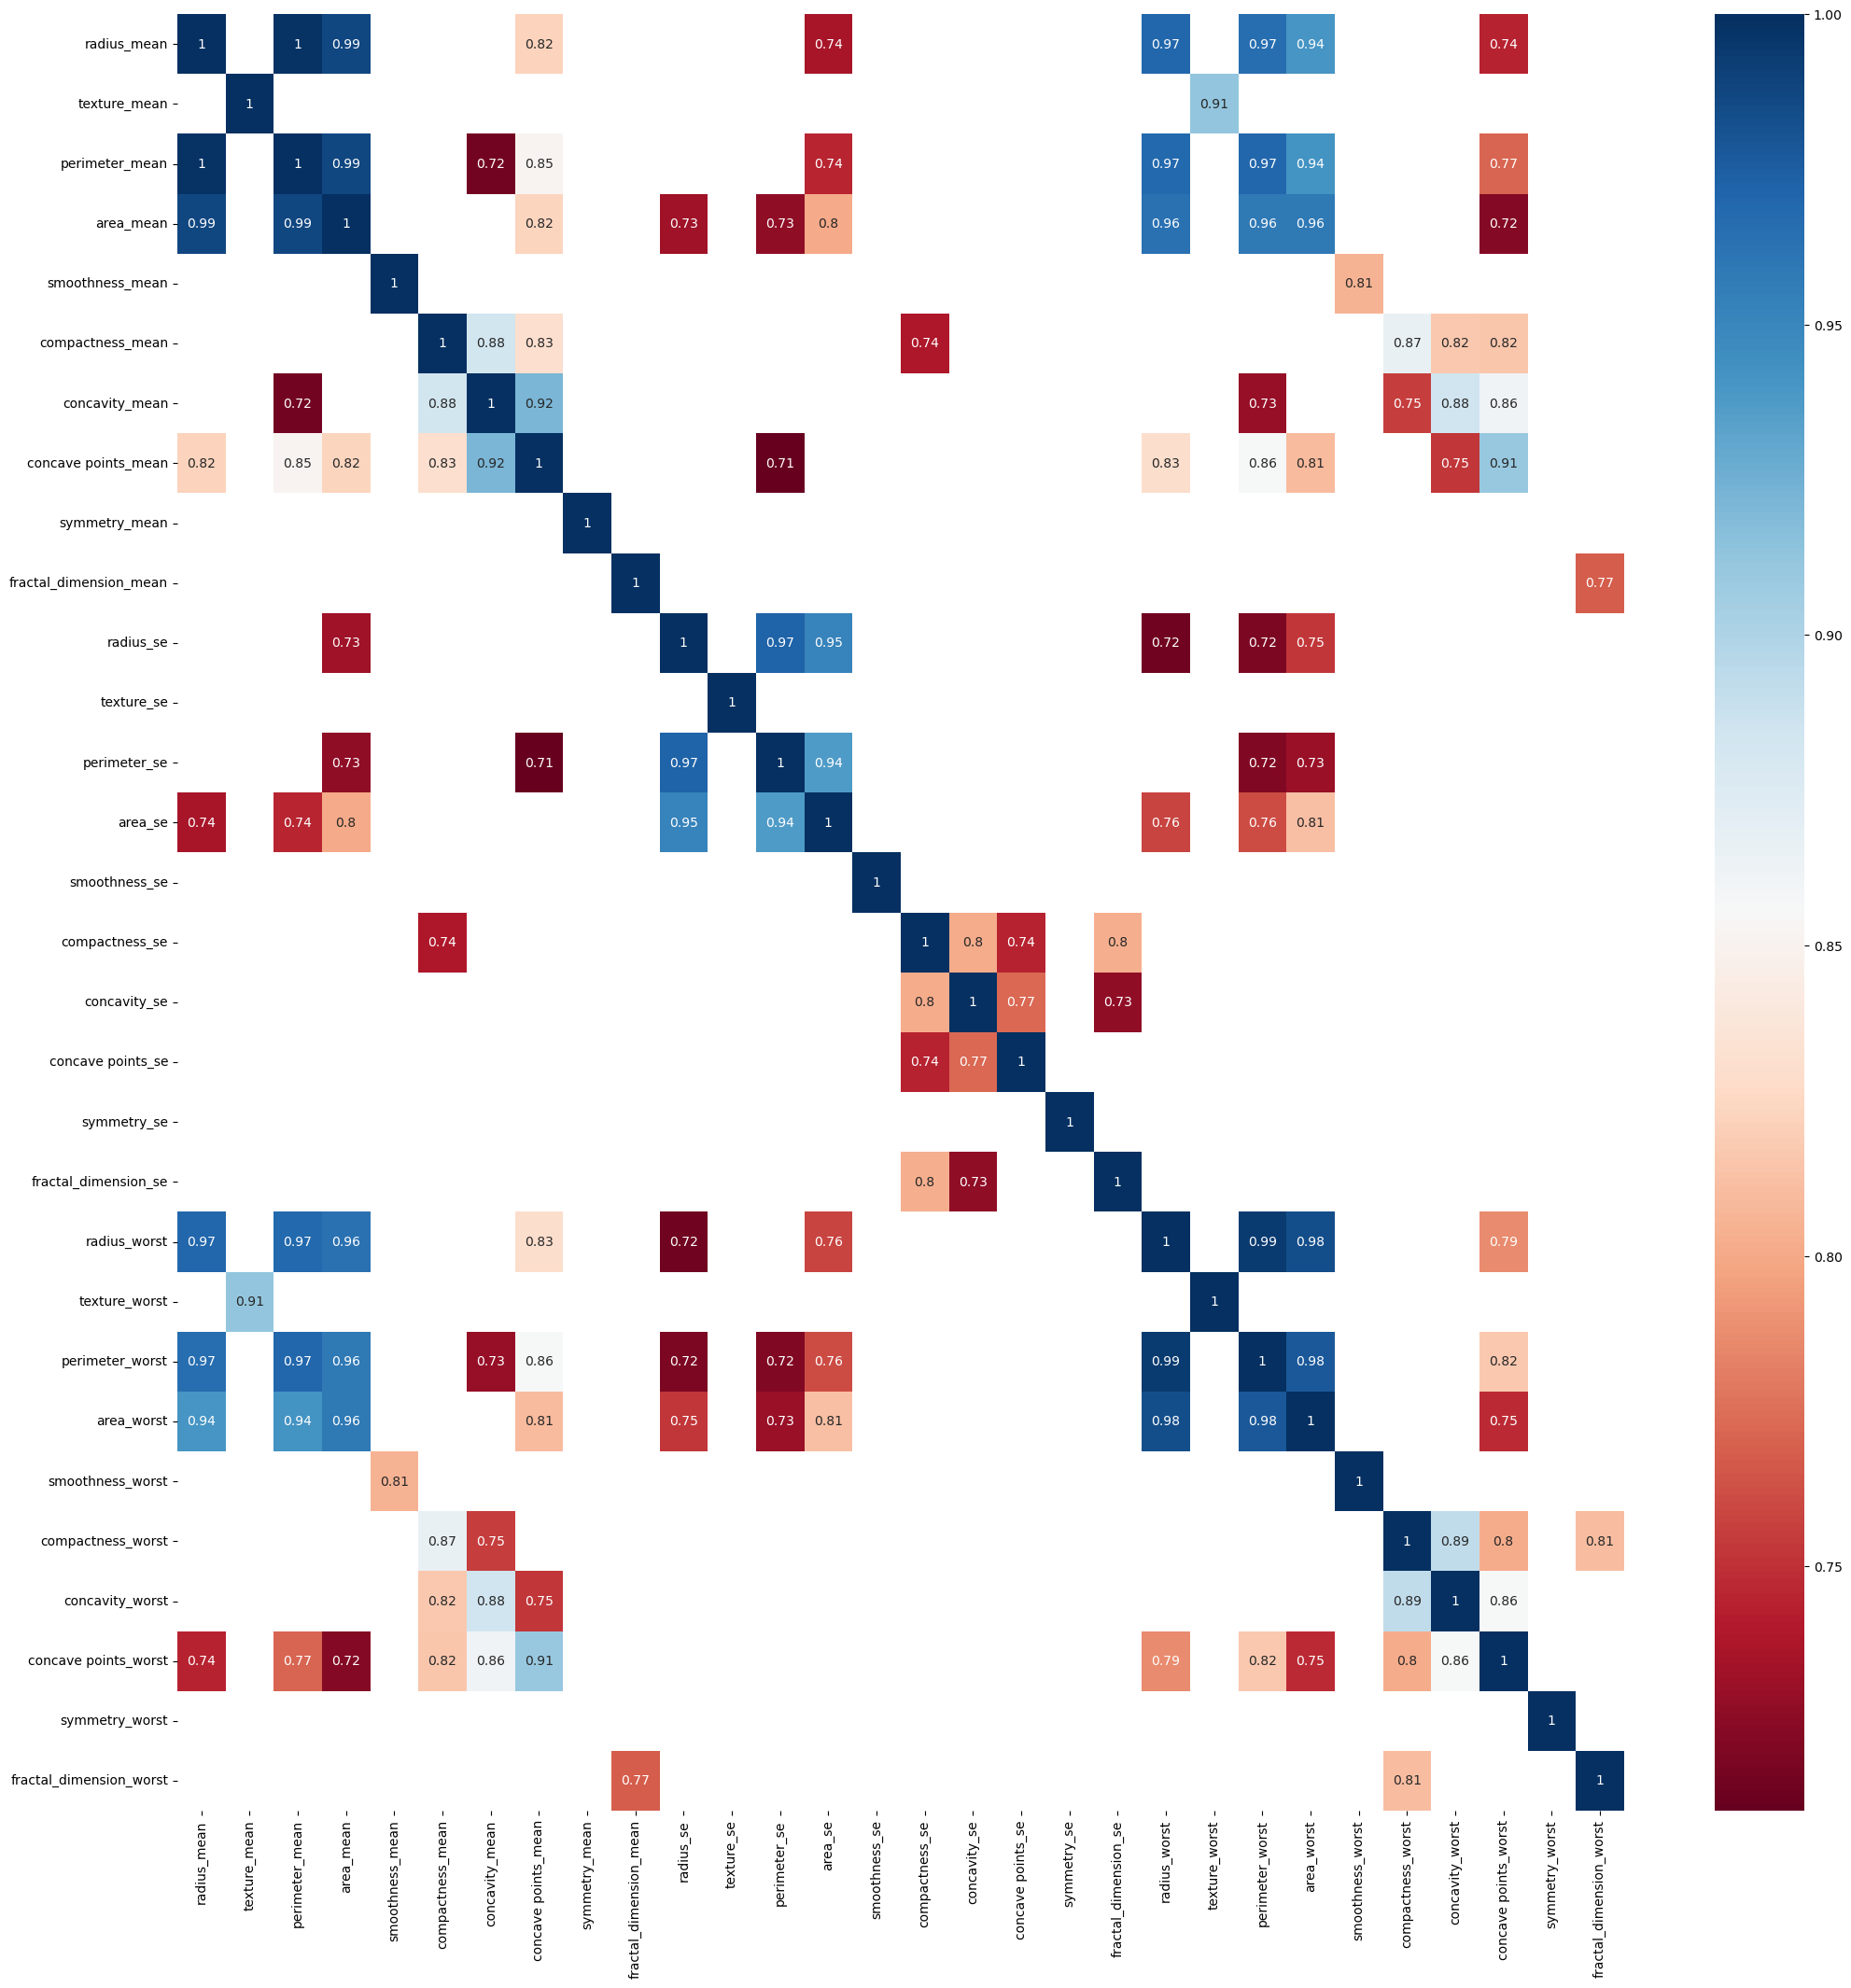

In [15]:
corr = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr[abs(corr)>0.7], annot=True, cmap='RdBu')
plt.show()

In [16]:
df.shape

(569, 31)

#### Fetch highly correlated features

In [17]:
def high_corr_feat(corr,thresh):
    res = []
    for i in range(len(corr.columns)): # i = 0,1,2..,29
        for j in range(i):             # i = 0,j=0,  i=1,j=0
            if corr.iloc[i,j] >= thresh:
                res.append(corr.columns[i])
    res = list(set(res))
    return res
    
feat_to_drop = high_corr_feat(corr,0.9)
print(feat_to_drop)
print(len(feat_to_drop))

['radius_worst', 'perimeter_worst', 'area_mean', 'area_se', 'area_worst', 'perimeter_mean', 'perimeter_se', 'concave points_worst', 'texture_worst', 'concave points_mean']
10


In [18]:
df.drop(feat_to_drop, axis=1,inplace=True)
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [19]:
df.shape

(569, 21)

### Outlier Treatment

In [20]:
df.describe(percentiles=[0.95,0.96,0.97,0.98,0.99]).T

count       mean       std       min        50%  \
radius_mean              569.0  14.127292  3.524049  6.981000  13.370000   
texture_mean             569.0  19.289649  4.301036  9.710000  18.840000   
smoothness_mean          569.0   0.096360  0.014064  0.052630   0.095870   
compactness_mean         569.0   0.104341  0.052813  0.019380   0.092630   
concavity_mean           569.0   0.088799  0.079720  0.000000   0.061540   
symmetry_mean            569.0   0.181162  0.027414  0.106000   0.179200   
fractal_dimension_mean   569.0   0.062798  0.007060  0.049960   0.061540   
radius_se                569.0   0.405172  0.277313  0.111500   0.324200   
texture_se               569.0   1.216853  0.551648  0.360200   1.108000   
smoothness_se            569.0   0.007041  0.003003  0.001713   0.006380   
compactness_se           569.0   0.025478  0.017908  0.002252   0.020450   
concavity_se             569.0   0.031894  0.030186  0.000000   0.025890   
concave points_se        569.0   0.011796  0.006170  0.000000   0.010930   
symmetry_se              569.0   0.020542  0.008266  0.007882   0.018730   
fractal_dimension_se     569.0   0.003795  0.002646  0.000895   0.003187   
smoothness_worst         569.0   0.132369  0.022832  0.071170   0.131300   
compactness_worst        569.0   0.254265  0.157336  0.027290   0.211900   
concavity_worst          569.0   0.272188  0.208624  0.000000   0.226700   
symmetry_worst           569.0   0.290076  0.061867  0.156500   0.282200   
fractal_dimension_worst  569.0   0.083946  0.018061  0.055040   0.080040   

                               95%        96%        97%        98%  \
radius_mean              20.576000  20.925600  21.552400  22.794800   
texture_mean             27.150000  27.922000  28.209600  29.315600   
smoothness_mean           0.118780   0.121656   0.123696   0.126724   
compactness_mean          0.208700   0.219392   0.227452   0.240688   
concavity_mean            0.243020   0.254640   0.286856   0.317528   
symmetry_mean             0.230720   0.237584   0.239796   0.253188   
fractal_dimension_mean    0.076090   0.077114   0.078173   0.080831   
radius_se                 0.959520   0.996256   1.057520   1.170200   
texture_se                2.212000   2.301680   2.506200   2.656440   
smoothness_se             0.012644   0.012955   0.013848   0.015280   
compactness_se            0.060578   0.066088   0.070548   0.080392   
concavity_se              0.078936   0.081787   0.092626   0.101584   
concave points_se         0.022884   0.024557   0.025907   0.027688   
symmetry_se               0.034988   0.037568   0.040748   0.044936   
fractal_dimension_se      0.007960   0.008745   0.009624   0.011415   
smoothness_worst          0.171840   0.177052   0.178888   0.185228   
compactness_worst         0.564120   0.592260   0.616184   0.687424   
concavity_worst           0.682380   0.696580   0.723708   0.783260   
symmetry_worst            0.406160   0.417192   0.436216   0.467448   
fractal_dimension_worst   0.119520   0.123496   0.125200   0.132388   

                               99%       max  
radius_mean              24.371600  28.11000  
texture_mean             30.652000  39.28000  
smoothness_mean           0.132888   0.16340  
compactness_mean          0.277192   0.34540  
concavity_mean            0.351688   0.42680  
symmetry_mean             0.259564   0.30400  
fractal_dimension_mean    0.085438   0.09744  
radius_se                 1.291320   2.87300  
texture_se                2.915440   4.88500  
smoothness_se             0.017258   0.03113  
compactness_se            0.089872   0.13540  
concavity_se              0.122292   0.39600  
concave points_se         0.031194   0.05279  
symmetry_se               0.052208   0.07895  
fractal_dimension_se      0.012650   0.02984  
smoothness_worst          0.188908   0.22260  
compactness_worst         0.778644   1.05800  
concavity_worst           0.902380   1.25200  
symmetry_worst            0.486908   0.6638

In [21]:
def outlier_treatment(x):
    x = x.clip(upper=0.95)
    x = x.clip(lower=x.quantile(0.01))
    return x

In [22]:
num_cols = df.dtypes[df.dtypes!='object'].index
print(num_cols)

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [23]:
df[num_cols] = df[num_cols].apply(outlier_treatment)

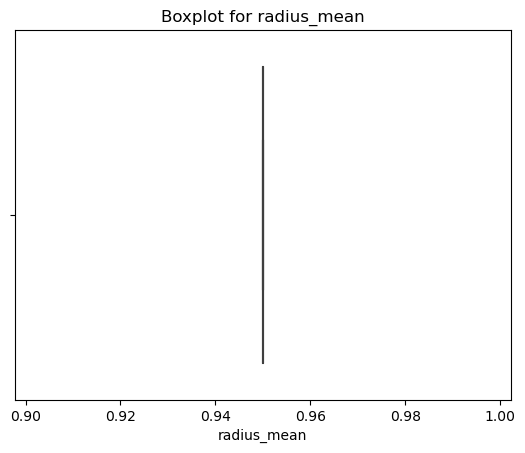

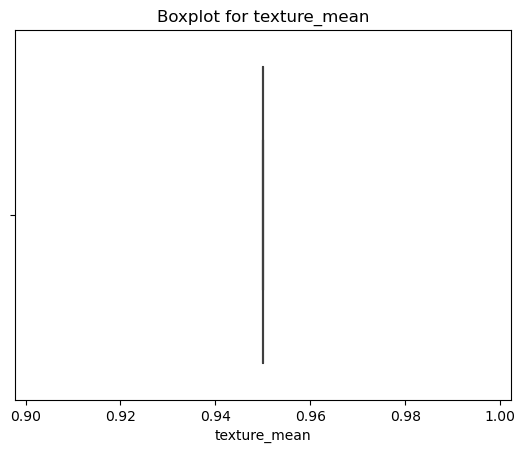

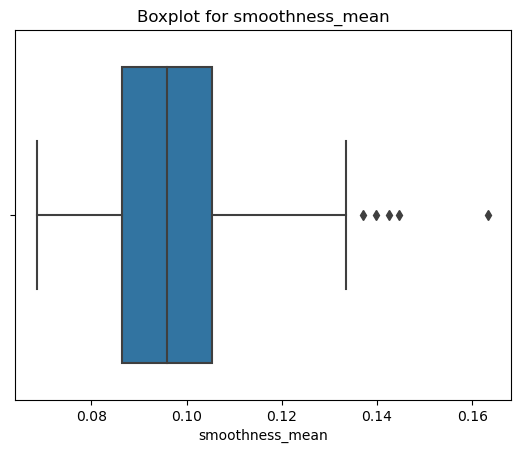

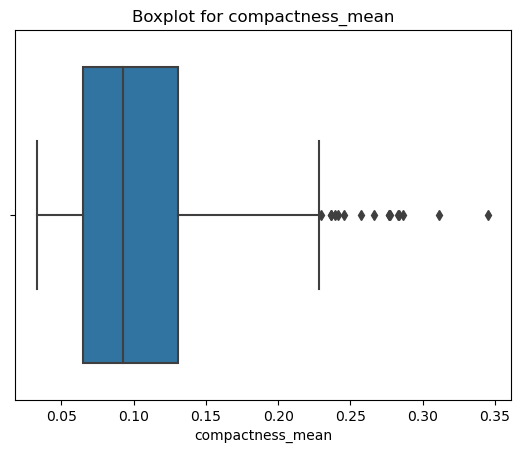

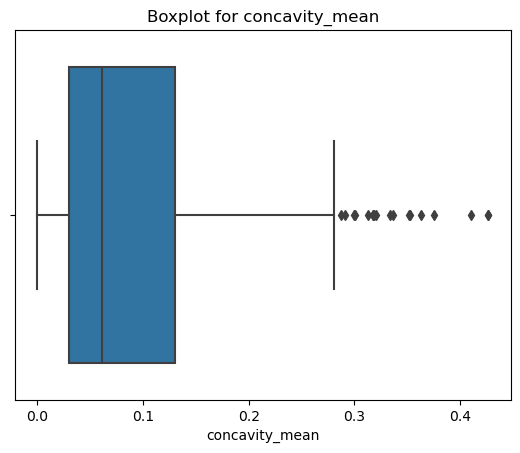

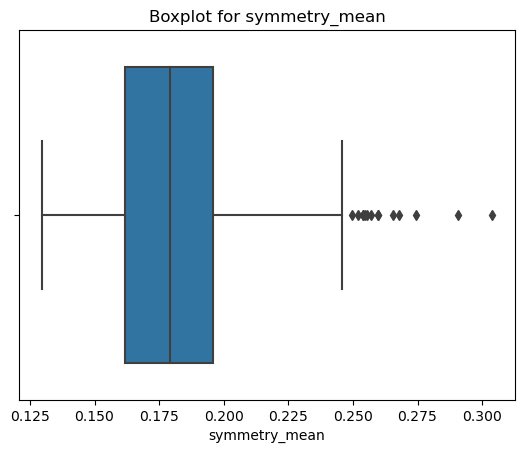

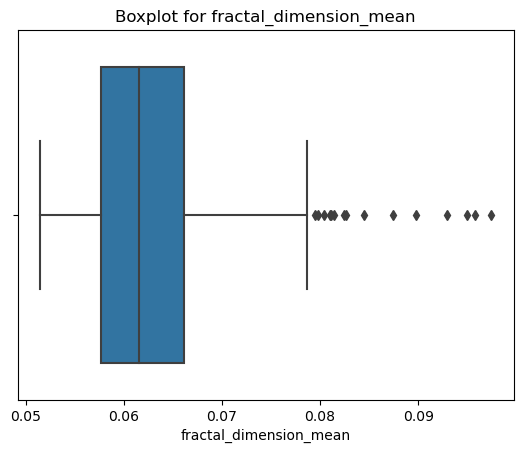

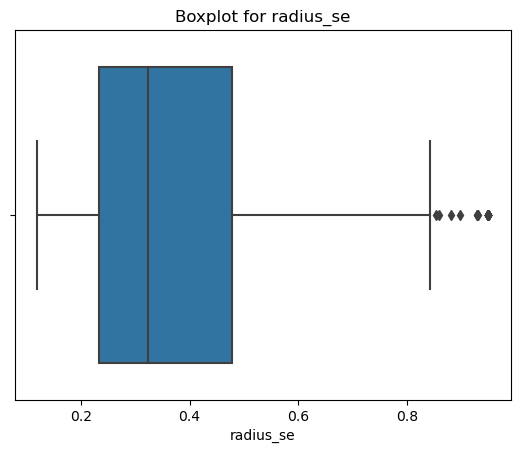

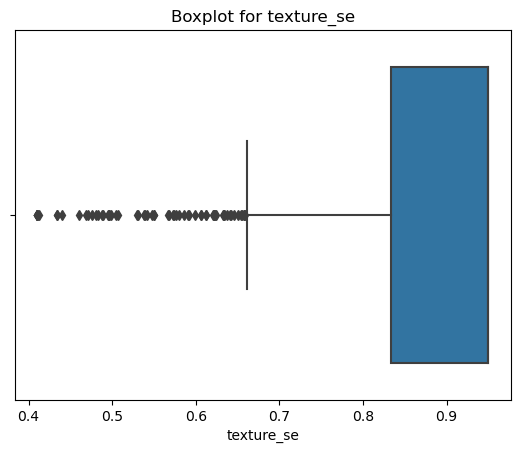

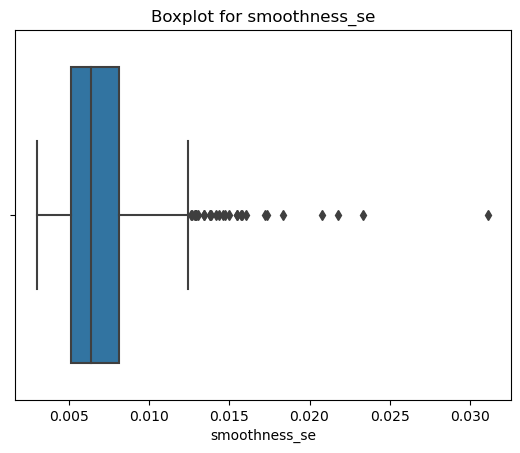

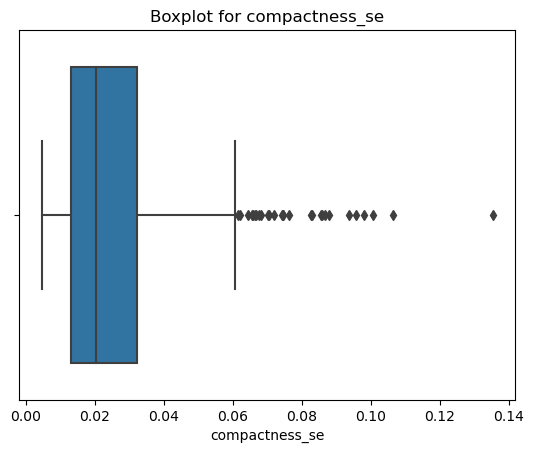

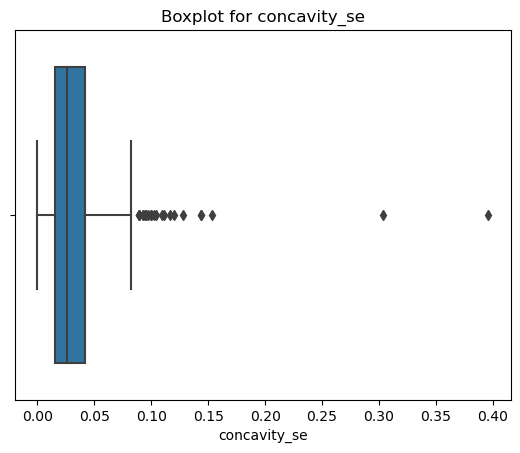

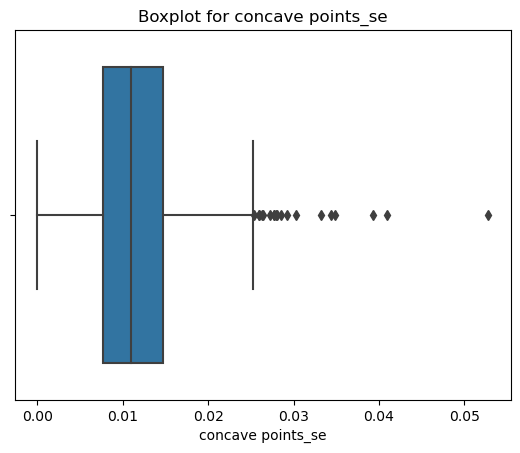

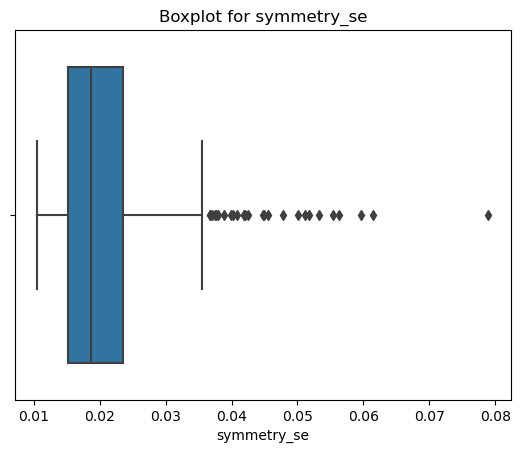

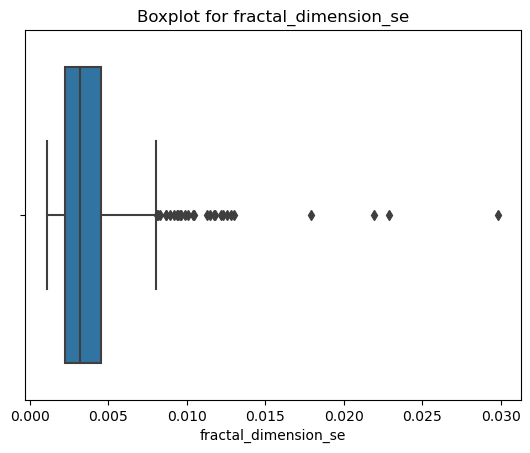

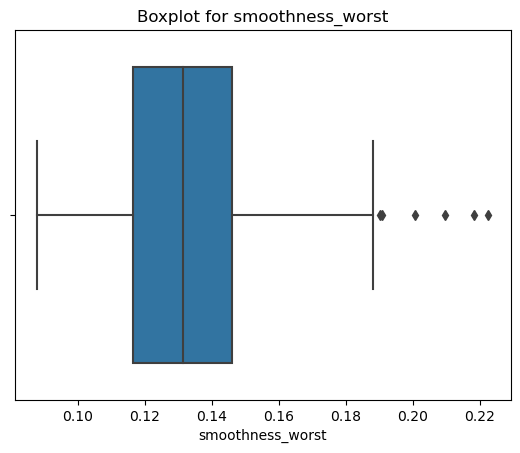

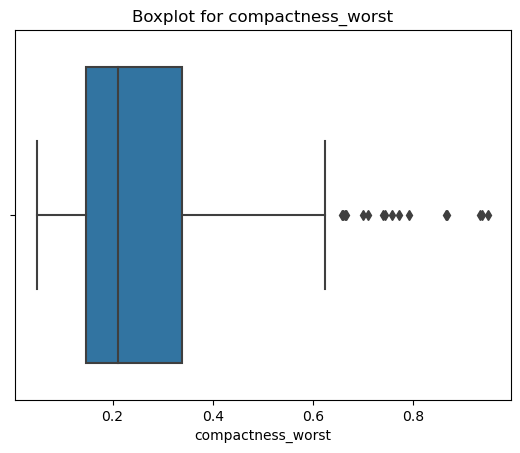

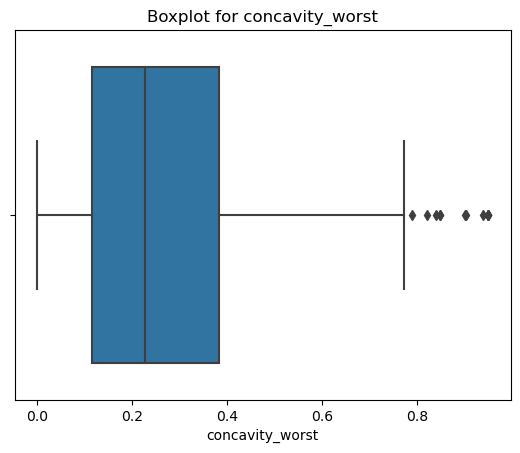

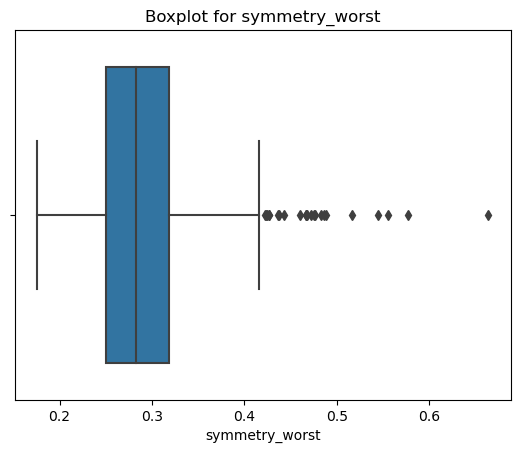

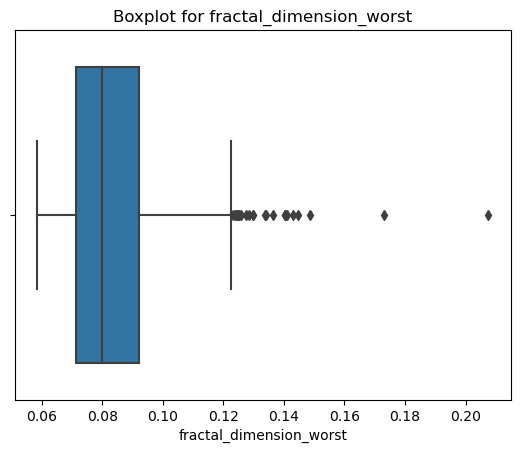

In [33]:
for i in num_cols:
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

### Selecting dependent and independent features

In [24]:
x = df.drop('diagnosis', axis=1)
y = df['diagnosis']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(569, 20)
(569,)


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 20)
(171, 20)
(398,)
(171,)


#### Creating a function to calculate Classification Metrics

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
def model_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    train_scr = model.score(x_train,y_train)
    test_scr = model.score(x_test,y_test)
    print('Training score',train_scr)
    print('Testing score',test_scr)
    ypred = model.predict(x_test)
    print('Predictions',ypred)
    cm = confusion_matrix(y_test,ypred)
    print(cm)
    print(classification_report(y_test,ypred))
    res = {'Train Score': train_scr, 'Test Score': test_scr}
    return res

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

### Model Building

#### 1. Random Forest

In [29]:
rf1 = RandomForestClassifier(n_estimators=80, criterion='gini', max_depth=10, min_samples_split=15,random_state=20)
model_metrics(rf1,x_train,x_test,y_train,y_test)

Training score 0.9849246231155779
Testing score 0.935672514619883
Predictions ['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M'
 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B']
[[104   4]
 [  7  56]]
              precision    recall  f1-score   support

           B       0.94      0.96      0.95       108
           M       0.93      0.89      0.91        63

    accuracy                           0

{'Train Score': 0.9849246231155779, 'Test Score': 0.935672514619883}

#### 2. AdaBoost

In [30]:
adboost = AdaBoostClassifier(n_estimators=80)
model_metrics(adboost,x_train,x_test,y_train,y_test)

Training score 1.0
Testing score 0.935672514619883
Predictions ['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M'
 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B'
 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B']
[[103   5]
 [  6  57]]
              precision    recall  f1-score   support

           B       0.94      0.95      0.95       108
           M       0.92      0.90      0.91        63

    accuracy                           0.94       171
 

{'Train Score': 1.0, 'Test Score': 0.935672514619883}

#### 3. XGBoost
in XGBoost binary classification, the taregt var is supposed to be 0 and 1. Model will not accept string based target variable. However, DT, Log_Reg, RF, AdaBoost models can accept string based target variable

In [31]:
from xgboost import XGBClassifier
import xgboost as xgb

In [32]:
# the target variable should always be int and never categorical, it will work in other models but not in xgboost
y_train1 = np.where(y_train=='B',0,1)
y_test1 = np.where (y_test=='B',0,1)

In [33]:
xgboost = XGBClassifier(objective='binary:logistic',eval_metric='logloss', n_estimators=80,max_depth=4,reg_lambda=0.2,eta=0.3,gamma=0.5,use_label_encoder=False,random_state=30)
model_metrics(xgboost,x_train,x_test,y_train1,y_test1)

Training score 1.0
Testing score 0.9239766081871345
Predictions [0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[[101   7]
 [  6  57]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       108
           1       0.89      0.90      0.90        63

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


{'Train Score': 1.0, 'Test Score': 0.9239766081871345}

#### Plotting feature significance

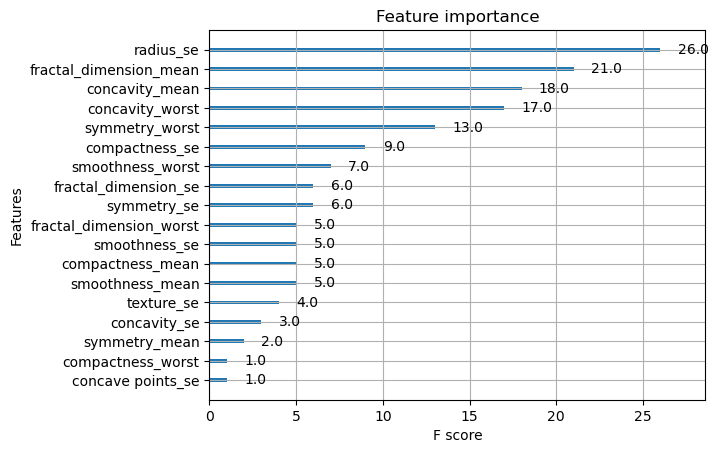

In [34]:
xgb.plot_importance (xgboost)
plt.show()

#### 4. GridSearchCV

In [35]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [36]:
hparams_xgb = {'n_estimators':[60,80,100,120,150], 'eta':[0.01,0.1,0.2,0.3,0.5], 
               'reg_lambda': [0.2,0.5,0.8],'gamma':[0.3,0.5,0.7]}

In [38]:
xgb_base = XGBClassifier(objective='binary:logistic',eval_metric='logloss', max_depth=4,use_label_encoder=False,random_state=30)
gs = GridSearchCV(estimator=xgb_base, param_grid=hparams_xgb, cv=5, scoring='accuracy', verbose=2)
gs.fit(x_train, y_train1)

/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[CV] END eta=0.01, gamma=0.3, n_estimators=60, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=60, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, n_estimators=60, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=60, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, n_estimators=60, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.01, gamma=0.3, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, n_estimators=60, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.01, gamma=0.3, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, n_estimators=80, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, n_estimators=80, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.01, gamma=0.3, n_estimators=80, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, n_estimators=80, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.01, gamma=0.3, n_estimators=80, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, n_estimators=100, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.01, gamma=0.3, n_estimators=100, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, n_estimators=100, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.3, n_estimators=100, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=100, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=100, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.3, n_estimators=100, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=100, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=100, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.3, n_estimators=100, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=100, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.3, n_estimators=120, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.3, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=120, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.3, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=120, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.3, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=120, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.3, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=150, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.3, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=150, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.3, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=150, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.3, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=150, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.3, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.01, gamma=0.3, n_estimators=150, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.3, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.01, gamma=0.5, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=60, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.01, gamma=0.5, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=60, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.01, gamma=0.5, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=80, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.01, gamma=0.5, n_estimators=80, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.5, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=80, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.01, gamma=0.5, n_estimators=80, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.01, gamma=0.5, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=80, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.01, gamma=0.5, n_estimators=100, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.5, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=100, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.5, n_estimators=100, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.5, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=100, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.01, gamma=0.5, n_estimators=100, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.01, gamma=0.5, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.5, n_estimators=100, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.01, gamma=0.5, n_estimators=100, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.01, gamma=0.5, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.5, n_estimators=120, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.5, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.5, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.5, n_estimators=120, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.5, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.01, gamma=0.5, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.01, gamma=0.5, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.01, gamma=0.5, n_estimators=120, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.5, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.01, gamma=0.5, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.01, gamma=0.5, n_estimators=120, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.5, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.01, gamma=0.5, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.01, gamma=0.5, n_estimators=120, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.5, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.5, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.5, n_estimators=150, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.5, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.5, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.5, n_estimators=150, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.5, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.01, gamma=0.5, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.01, gamma=0.5, n_estimators=150, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.5, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.01, gamma=0.5, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.01, gamma=0.5, n_estimators=150, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.5, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.01, gamma=0.5, n_estimators=150, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.5, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.01, gamma=0.7, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.01, gamma=0.7, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.01, gamma=0.7, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.01, gamma=0.7, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.01, gamma=0.7, n_estimators=60, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.01, gamma=0.7, n_estimators=60, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.01, gamma=0.7, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.01, gamma=0.7, n_estimators=60, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.01, gamma=0.7, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.01, gamma=0.7, n_estimators=60, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.01, gamma=0.7, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.7, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.7, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.7, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.7, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.7, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.01, gamma=0.7, n_estimators=80, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.01, gamma=0.7, n_estimators=80, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.7, n_estimators=80, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.7, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.01, gamma=0.7, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.01, gamma=0.7, n_estimators=80, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.01, gamma=0.7, n_estimators=80, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.01, gamma=0.7, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.01, gamma=0.7, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.01, gamma=0.7, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.7, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.7, n_estimators=80, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.01, gamma=0.7, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.7, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.7, n_estimators=100, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.7, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.01, gamma=0.7, n_estimators=100, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.01, gamma=0.7, n_estimators=100, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.7, n_estimators=100, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.7, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.01, gamma=0.7, n_estimators=100, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.7, n_estimators=100, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.01, gamma=0.7, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.01, gamma=0.7, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.01, gamma=0.7, n_estimators=100, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.7, n_estimators=100, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.01, gamma=0.7, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.7, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.7, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.01, gamma=0.7, n_estimators=120, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.01, gamma=0.7, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.7, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.7, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.7, n_estimators=120, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.7, n_estimators=120, reg_lambda=0.5; total time=   0.2s
[CV] END eta=0.01, gamma=0.7, n_estimators=120, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.7, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.01, gamma=0.7, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.01, gamma=0.7, n_estimators=120, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.7, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.01, gamma=0.7, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.01, gamma=0.7, n_estimators=120, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.7, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.01, gamma=0.7, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.01, gamma=0.7, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.7, n_estimators=150, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.7, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.01, gamma=0.7, n_estimators=150, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.7, n_estimators=150, reg_lambda=0.2; total time=   0.2s
[CV] END eta=0.01, gamma=0.7, n_estimators=150, reg_lambda=0.5; total time=   0.2s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.7, n_estimators=150, reg_lambda=0.5; total time=   0.2s
[CV] END eta=0.01, gamma=0.7, n_estimators=150, reg_lambda=0.5; total time=   0.2s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.7, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.01, gamma=0.7, n_estimators=150, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.7, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.01, gamma=0.7, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.01, gamma=0.7, n_estimators=150, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.01, gamma=0.7, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.01, gamma=0.7, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=60, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.1, gamma=0.3, n_estimators=60, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=60, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.1, gamma=0.3, n_estimators=60, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=80, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.1, gamma=0.3, n_estimators=80, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=80, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.1, gamma=0.3, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=80, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=80, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.1, gamma=0.3, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=100, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.1, gamma=0.3, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=100, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.1, gamma=0.3, n_estimators=100, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=100, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.1, gamma=0.3, n_estimators=100, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, n_estimators=100, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, n_estimators=120, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.1, gamma=0.3, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, n_estimators=120, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.1, gamma=0.3, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, n_estimators=120, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.3, n_estimators=120, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.1, gamma=0.3, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, n_estimators=120, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.1, gamma=0.3, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, n_estimators=150, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.1, gamma=0.3, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, n_estimators=150, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.1, gamma=0.3, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, n_estimators=150, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.1, gamma=0.3, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, n_estimators=150, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.1, gamma=0.3, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.3, n_estimators=150, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.1, gamma=0.3, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, n_estimators=60, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.1, gamma=0.5, n_estimators=60, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=60, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=60, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, n_estimators=60, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.1, gamma=0.5, n_estimators=60, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, n_estimators=60, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, n_estimators=80, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.1, gamma=0.5, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, n_estimators=80, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=80, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=80, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.1, gamma=0.5, n_estimators=80, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, n_estimators=80, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.1, gamma=0.5, n_estimators=80, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, n_estimators=100, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.1, gamma=0.5, n_estimators=100, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, n_estimators=100, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.1, gamma=0.5, n_estimators=100, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, n_estimators=100, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.1, gamma=0.5, n_estimators=100, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=100, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=120, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.1, gamma=0.5, n_estimators=120, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=120, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, n_estimators=120, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.1, gamma=0.5, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=120, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.1, gamma=0.5, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=120, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, n_estimators=120, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, n_estimators=120, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.5, n_estimators=120, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.1, gamma=0.5, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=150, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.1, gamma=0.5, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=150, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.1, gamma=0.5, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=150, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.1, gamma=0.5, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.5, n_estimators=150, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.1, gamma=0.7, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=60, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.1, gamma=0.7, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=60, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.1, gamma=0.7, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=80, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.1, gamma=0.7, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=80, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.1, gamma=0.7, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=80, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.1, gamma=0.7, n_estimators=80, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.7, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=100, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.1, gamma=0.7, n_estimators=100, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.1, gamma=0.7, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=100, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.1, gamma=0.7, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=100, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.1, gamma=0.7, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=100, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.1, gamma=0.7, n_estimators=100, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.7, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=100, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.1, gamma=0.7, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.1, gamma=0.7, n_estimators=120, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=120, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.1, gamma=0.7, n_estimators=120, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.1, gamma=0.7, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.1, gamma=0.7, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.1, gamma=0.7, n_estimators=120, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=120, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.1, gamma=0.7, n_estimators=120, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.1, gamma=0.7, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.7, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.7, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.7, n_estimators=120, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.1, gamma=0.7, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.7, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.1, gamma=0.7, n_estimators=150, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.1, gamma=0.7, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.1, gamma=0.7, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.1, gamma=0.7, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.1, gamma=0.7, n_estimators=150, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.1, gamma=0.7, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.1, gamma=0.7, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.1, gamma=0.7, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.1, gamma=0.7, n_estimators=150, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.1, gamma=0.7, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.7, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.7, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.1, gamma=0.7, n_estimators=150, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.1, gamma=0.7, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=60, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=60, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.2, gamma=0.3, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=60, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.2, gamma=0.3, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=80, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.2, gamma=0.3, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=80, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.2, gamma=0.3, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=100, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.2, gamma=0.3, n_estimators=100, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, n_estimators=100, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, n_estimators=100, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=100, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.2, gamma=0.3, n_estimators=100, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=100, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.2, gamma=0.3, n_estimators=100, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, n_estimators=100, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, n_estimators=120, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.2, gamma=0.3, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, n_estimators=120, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.2, gamma=0.3, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, n_estimators=120, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, n_estimators=120, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.2, gamma=0.3, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, n_estimators=120, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=120, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=120, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=120, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.2, gamma=0.3, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, n_estimators=150, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.3, n_estimators=150, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.2, gamma=0.3, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, n_estimators=150, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.2, gamma=0.3, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, n_estimators=150, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.2, gamma=0.3, n_estimators=150, reg_lambda=0.8; total time=   0.2s
[CV] END eta=0.2, gamma=0.3, n_estimators=150, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.2, gamma=0.3, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.2, gamma=0.3, n_estimators=150, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.2, gamma=0.3, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, n_estimators=60, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.2, gamma=0.5, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, n_estimators=60, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.2, gamma=0.5, n_estimators=60, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=60, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, n_estimators=60, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.2, gamma=0.5, n_estimators=80, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=80, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=80, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=80, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.2, gamma=0.5, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, n_estimators=80, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.2, gamma=0.5, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, n_estimators=80, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=80, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=80, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.2, gamma=0.5, n_estimators=100, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, n_estimators=100, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=100, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=100, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.2, gamma=0.5, n_estimators=100, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, n_estimators=100, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.2, gamma=0.5, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, n_estimators=100, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=100, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.2, gamma=0.5, n_estimators=100, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=100, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=120, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.2, gamma=0.5, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=120, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.5, n_estimators=120, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.2, gamma=0.5, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=120, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.2, gamma=0.5, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=120, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.2, gamma=0.5, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=120, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.2, gamma=0.5, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=150, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.2, gamma=0.5, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=150, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.2, gamma=0.5, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=150, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.2, gamma=0.5, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=150, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.2, gamma=0.5, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.2, gamma=0.5, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.2, gamma=0.7, n_estimators=60, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.2, gamma=0.7, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=60, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.2, gamma=0.7, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=80, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.2, gamma=0.7, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=80, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.2, gamma=0.7, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=80, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.2, gamma=0.7, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=100, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.2, gamma=0.7, n_estimators=100, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.2, gamma=0.7, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=100, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.2, gamma=0.7, n_estimators=100, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.2, gamma=0.7, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=100, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.2, gamma=0.7, n_estimators=100, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.2, gamma=0.7, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=120, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=120, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=120, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.2, gamma=0.7, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.2, gamma=0.7, n_estimators=120, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=120, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=120, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=120, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.2, gamma=0.7, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.2, gamma=0.7, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.2, gamma=0.7, n_estimators=120, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.2, gamma=0.7, n_estimators=120, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.2, gamma=0.7, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.2, gamma=0.7, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.2, gamma=0.7, n_estimators=120, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.2, gamma=0.7, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.2, gamma=0.7, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.2, gamma=0.7, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.2, gamma=0.7, n_estimators=150, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.2, gamma=0.7, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.2, gamma=0.7, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.2, gamma=0.7, n_estimators=150, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.2, gamma=0.7, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.2, gamma=0.7, n_estimators=150, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.2, gamma=0.7, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.2, gamma=0.7, n_estimators=150, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.2, gamma=0.7, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.2, gamma=0.7, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.2, gamma=0.7, n_estimators=150, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.2, gamma=0.7, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.3, gamma=0.3, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=60, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.3, gamma=0.3, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=80, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.3, gamma=0.3, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=80, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.3, gamma=0.3, n_estimators=80, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.3, gamma=0.3, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=80, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.3, gamma=0.3, n_estimators=80, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.3, gamma=0.3, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=100, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.3, gamma=0.3, n_estimators=100, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.3, gamma=0.3, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=100, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.3, gamma=0.3, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=120, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=120, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.3, gamma=0.3, n_estimators=120, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=120, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.3, gamma=0.3, n_estimators=120, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.3, gamma=0.3, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.3, gamma=0.3, n_estimators=120, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=120, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=120, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=120, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.3, gamma=0.3, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.3, gamma=0.3, n_estimators=120, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=120, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=120, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=150, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.3, gamma=0.3, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.3, gamma=0.3, n_estimators=150, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.3, gamma=0.3, n_estimators=150, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.3, gamma=0.3, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.3, gamma=0.3, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.3, gamma=0.3, n_estimators=150, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.3, n_estimators=150, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.3, gamma=0.3, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.3, gamma=0.3, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.3, gamma=0.3, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.3, gamma=0.3, n_estimators=150, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.3, gamma=0.3, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.3, gamma=0.3, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.3, gamma=0.5, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=60, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.3, gamma=0.5, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=60, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.3, gamma=0.5, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=80, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.3, gamma=0.5, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=80, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.3, gamma=0.5, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=100, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.3, gamma=0.5, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=100, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.3, gamma=0.5, n_estimators=100, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.3, gamma=0.5, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=100, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.3, gamma=0.5, n_estimators=120, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=120, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=120, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=120, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=120, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.3, gamma=0.5, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.3, gamma=0.5, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.3, gamma=0.5, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.3, gamma=0.5, n_estimators=120, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.3, gamma=0.5, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.3, gamma=0.5, n_estimators=120, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=120, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=120, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=120, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.3, gamma=0.5, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.3, gamma=0.5, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.3, gamma=0.5, n_estimators=150, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.5, n_estimators=150, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.3, gamma=0.5, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.3, gamma=0.5, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.3, gamma=0.5, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.3, gamma=0.5, n_estimators=150, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.3, gamma=0.5, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.3, gamma=0.5, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.3, gamma=0.5, n_estimators=150, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.3, gamma=0.5, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.3, gamma=0.5, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.3, gamma=0.5, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.3, gamma=0.5, n_estimators=150, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.3, gamma=0.5, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.7, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.7, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.7, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.7, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.7, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.7, n_estimators=60, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.3, gamma=0.7, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.7, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.7, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.7, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.7, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.7, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.7, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.3, gamma=0.7, n_estimators=60, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.3, gamma=0.7, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.7, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.7, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.7, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.7, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.7, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.7, n_estimators=80, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.3, gamma=0.7, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.7, n_estimators=80, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=80, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.3, gamma=0.7, n_estimators=80, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=80, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=80, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.3, gamma=0.7, n_estimators=80, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=80, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=100, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.3, gamma=0.7, n_estimators=100, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=100, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.7, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.3, gamma=0.7, n_estimators=100, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.3, gamma=0.7, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.7, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.7, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.7, n_estimators=100, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.3, gamma=0.7, n_estimators=100, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=100, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=100, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.3, gamma=0.7, n_estimators=100, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=100, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=120, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.3, gamma=0.7, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=120, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.3, gamma=0.7, n_estimators=120, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.7, n_estimators=120, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.3, gamma=0.7, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=120, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.3, gamma=0.7, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=120, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.3, gamma=0.7, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=150, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.3, gamma=0.7, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=150, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.3, gamma=0.7, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=150, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.3, gamma=0.7, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=150, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.3, gamma=0.7, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.3, gamma=0.7, n_estimators=150, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.3, gamma=0.7, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.5, gamma=0.3, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=60, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.5, gamma=0.3, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=60, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.5, gamma=0.3, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=80, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.5, gamma=0.3, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=80, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.5, gamma=0.3, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=100, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.5, gamma=0.3, n_estimators=100, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.5, gamma=0.3, n_estimators=100, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.5, gamma=0.3, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=100, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.3, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=100, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.5, gamma=0.3, n_estimators=100, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.5, gamma=0.3, n_estimators=100, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.5, gamma=0.3, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=100, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.3, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=120, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=120, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=120, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=120, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.5, gamma=0.3, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.5, gamma=0.3, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.3, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.3, n_estimators=120, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.3, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.3, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.3, n_estimators=120, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=120, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.3, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.5, gamma=0.3, n_estimators=120, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=120, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=150, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.3, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.5, gamma=0.3, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.5, gamma=0.3, n_estimators=150, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.3, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.5, gamma=0.3, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.3, n_estimators=150, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.3, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.3, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.3, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.3, n_estimators=150, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.5, gamma=0.3, n_estimators=150, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.5, gamma=0.3, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.5, gamma=0.3, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.5, gamma=0.3, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=60, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.5, n_estimators=60, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, n_estimators=60, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.5, gamma=0.5, n_estimators=60, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, n_estimators=60, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=60, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=60, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.5, gamma=0.5, n_estimators=60, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, n_estimators=60, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.5, n_estimators=80, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=80, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=80, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, n_estimators=80, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.5, gamma=0.5, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, n_estimators=80, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=80, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, n_estimators=80, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.5, gamma=0.5, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, n_estimators=80, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=100, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.5, gamma=0.5, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, n_estimators=100, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.5, n_estimators=100, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=100, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=100, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, n_estimators=100, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.5, gamma=0.5, n_estimators=100, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, n_estimators=100, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.5, n_estimators=100, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=120, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.5, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=120, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.5, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=120, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.5, gamma=0.5, n_estimators=120, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.5, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=120, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.5, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=120, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.5, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=150, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.5, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=150, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.5, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=150, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.5, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=150, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.5, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=150, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.5, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.5, gamma=0.5, n_estimators=150, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.5, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.5, gamma=0.7, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.5, gamma=0.7, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.5, gamma=0.7, n_estimators=60, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.5, gamma=0.7, n_estimators=60, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.5, gamma=0.7, n_estimators=60, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.5, gamma=0.7, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.5, gamma=0.7, n_estimators=60, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.5, gamma=0.7, n_estimators=60, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.5, gamma=0.7, n_estimators=60, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.5, gamma=0.7, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.5, gamma=0.7, n_estimators=60, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.5, gamma=0.7, n_estimators=60, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.5, gamma=0.7, n_estimators=80, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=80, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=80, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=80, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.7, n_estimators=80, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.5, gamma=0.7, n_estimators=80, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=80, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.7, n_estimators=80, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=80, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=80, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.7, n_estimators=80, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=80, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=80, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=80, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.7, n_estimators=80, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.5, gamma=0.7, n_estimators=100, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.5, gamma=0.7, n_estimators=100, reg_lambda=0.2; total time=   0.0s
[CV] END eta=0.5, gamma=0.7, n_estimators=100, reg_lambda=0.2; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.5, gamma=0.7, n_estimators=100, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.5, gamma=0.7, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.5, gamma=0.7, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.5, gamma=0.7, n_estimators=100, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.5, gamma=0.7, n_estimators=100, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.5, gamma=0.7, n_estimators=100, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=100, reg_lambda=0.8; total time=   0.0s
[CV] END eta=0.5, gamma=0.7, n_estimators=100, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=100, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.7, n_estimators=100, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=120, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.7, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=120, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=120, reg_lambda=0.5; total time=   0.0s
[CV] END eta=0.5, gamma=0.7, n_estimators=120, reg_lambda=0.5; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

[CV] END eta=0.5, gamma=0.7, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=120, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=120, reg_lambda=0.8; total time=   0.0s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.7, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=120, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=120, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.7, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=150, reg_lambda=0.2; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.7, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=150, reg_lambda=0.2; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=150, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.7, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=150, reg_lambda=0.5; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=150, reg_lambda=0.5; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.7, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=150, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.7, n_estimators=150, reg_lambda=0.8; total time=   0.1s
[CV] END eta=0.5, gamma=0.7, n_estimators=150, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END eta=0.5, gamma=0.7, n_estimators=150, reg_lambda=0.8; total time=   0.1s


/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=4,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                      

In [39]:
print(gs.best_params_)
print(gs.best_estimator_)

{'eta': 0.5, 'gamma': 0.5, 'n_estimators': 60, 'reg_lambda': 0.8}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.5, eval_metric='logloss',
              feature_types=None, gamma=0.5, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=60, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)


In [40]:
gsr = pd.DataFrame(gs.cv_results_)
print(gsr.shape)
gsr.head()

(225, 17)


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_eta  \
0       0.046177      0.015268         0.010712        0.018612      0.01   
1       0.032044      0.008211         0.001318        0.000242      0.01   
2       0.031008      0.007040         0.001596        0.000890      0.01   
3       0.044110      0.020477         0.001215        0.000091      0.01   
4       0.045642      0.021777         0.001649        0.000404      0.01   

  param_gamma param_n_estimators param_reg_lambda  \
0         0.3                 60              0.2   
1         0.3                 60              0.5   
2         0.3                 60              0.8   
3         0.3                 80              0.2   
4         0.3                 80              0.5   

                                              params  split0_test_score  \
0  {'eta': 0.01, 'gamma': 0.3, 'n_estimators': 60...             0.9125   
1  {'eta': 0.01, 'gamma': 0.3, 'n_estimators': 60...             0.9125   
2  {'eta': 0.01, 'gamma': 0.3, 'n_estimators': 60...             0.9125   
3  {'eta': 0.01, 'gamma': 0.3, 'n_estimators': 80...             0.9000   
4  {'eta': 0.01, 'gamma': 0.3, 'n_estimators': 80...             0.9000   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0             0.8625             0.9125           0.873418           0.848101   
1             0.8625             0.9125           0.873418           0.860759   
2             0.8625             0.8875           0.873418           0.848101   
3             0.8625             0.9125           0.886076           0.873418   
4             0.8625             0.9125           0.886076           0.860759   

   mean_test_score  std_test_score  rank_test_score  
0         0.881804        0.026319              220  
1         0.884335        0.023402              213  
2         0.876804        0.022039              223  
3         0.886899        0.017915              198  
4         0.884367        0.020368              207

In [41]:
res = gsr[gsr['mean_test_score']==gsr['mean_test_score'].max()]
res[['param_eta','param_gamma','param_n_estimators','param_reg_lambda']]

param_eta param_gamma param_n_estimators param_reg_lambda
197       0.5         0.5                 60              0.8
200       0.5         0.5                 80              0.8
203       0.5         0.5                100              0.8
206       0.5         0.5                120              0.8
209       0.5         0.5                150              0.8

In [42]:
# {'eta': 0.2, 'gamma': 0.3, 'n_estimators': 60, 'reg_lambda': 0.5}
res = gsr[gsr['mean_test_score']==gsr['mean_test_score'].max()]
res[['param_eta','param_gamma','param_n_estimators','param_reg_lambda']]

param_eta param_gamma param_n_estimators param_reg_lambda
197       0.5         0.5                 60              0.8
200       0.5         0.5                 80              0.8
203       0.5         0.5                100              0.8
206       0.5         0.5                120              0.8
209       0.5         0.5                150              0.8

In [43]:
xgb_after_gs = XGBClassifier(objective='binary:logistic',eval_metric='logloss',
                       max_depth=5,use_label_encoder=False,random_state=30,
                         **gs.best_params_)
xgb_after_gs.fit(x_train,y_train1)

/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.5, eval_metric='logloss',
              feature_types=None, gamma=0.5, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=60, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [44]:
ypred_xgb_after_gs = xgb_after_gs.predict(x_test)

In [45]:
res = x_test.copy()

In [46]:
res['Pred'] = ypred_xgb_after_gs
res.head()

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
204         0.95          0.95          0.09965            0.1058   
70          0.95          0.95          0.09009            0.1029   
131         0.95          0.95          0.10920            0.1223   
431         0.95          0.95          0.10540            0.1316   
540         0.95          0.95          0.09984            0.1120   

     concavity_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
204         0.08005         0.1925                 0.06373     0.3961   
70          0.10800         0.1582                 0.05461     0.7888   
131         0.14660         0.1931                 0.05796     0.4743   
431         0.07741         0.1811                 0.07102     0.1767   
540         0.06737         0.1818                 0.06782     0.2784   

     texture_se  smoothness_se  ...  concavity_se  concave points_se  \
204      0.9500       0.006953  ...       0.02701            0.01037   
70       0.7975       0.004444  ...       0.02269            0.01370   
131      0.7859       0.006240  ...       0.02813            0.01093   
431      0.9500       0.010000  ...       0.04861            0.01167   
540      0.9500       0.012150  ...       0.05553            0.01494   

     symmetry_se  fractal_dimension_se  smoothness_worst  compactness_worst  \
204      0.01782              0.003586            0.1426             0.2378   
70       0.01386              0.001698            0.1193             0.2336   
131      0.01397              0.002461            0.1546             0.2394   
431      0.02187              0.006005            0.1450             0.2629   
540      0.01840              0.005512            0.1345             0.2118   

     concavity_worst  symmetry_worst  fractal_dimension_worst  Pred  
204           0.2671          0.3014                  0.08750     1  
70            0.2687          0.2551                  0.06589     1  
131           0.3791          0.2837                  0.08019     1  
431           0.2403          0.2556                  0.09359     0  
540           0.1797          0.2329                  0.08134     0  

[5 rows x 21 columns]

In [47]:
res['Pred'].value_counts()

0    105
1     66
Name: Pred, dtype: int64

In [48]:
res['Pred'] = np.where(res['Pred']==0,'B','M')
res['Pred'].value_counts()
# y_train1 = np.where(y_train=='B',0,1)
# y_test1 = np.where(y_test=='B',0,1)

B    105
M     66
Name: Pred, dtype: int64

In [ ]:
res.to_csv('pred_res.csv')

In [ ]:
# {'eta': 0.2, 'gamma': 0.3, 'n_estimators': 60, 'reg_lambda': 0.5}
# hparams_xgb = {'n_estimators':[70,75,85,95,110,140],
#               'eta':[0.05,0.001,0.2,0.6,0.4],  [0.0,0.1,0.2,0.3,0.5]
#               'reg_lambda':[0.3,0.4,0.7,0.5],
#               'gamma':[0.3,0.5,0.7]}